In [1517]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

from datetime import datetime, timedelta
pd.set_option('display.max_columns', 5000)

_______________

# Sleep Data Analysis

In [1518]:
sleep_df = pd.read_csv('../Project/sleep-export2.csv')

In [1519]:
sleep_df.head()

Unnamed: 0  efficiency  has_sleep_data  \
0           0   92.663040             1.0   
1           1   87.788020             1.0   
2           2   90.026955             1.0   
3           3   93.162390             1.0   
4           4   93.750000             1.0   

      com.samsung.health.sleep.datauuid  quality  \
0  03f12ce0-9ade-5c74-9d57-686fd3966f2a  50003.0   
1  0419de25-ff8a-e425-0864-7e83b7f5d991      NaN   
2  048b90e0-1e31-7875-337c-e9d8c24bea59      NaN   
3  058e45d4-2bda-fc5f-6545-c965c65fea43      NaN   
4  059021fb-39a7-ab8c-e488-662743e11821      NaN   

   com.samsung.health.sleep.custom  com.samsung.health.sleep.end_time  \
0                              NaN                      1520501400000   
1                              NaN                      1519565280000   
2                              NaN                      1527932940000   
3                              NaN                      1529749920000   
4                              NaN                      1515159660000   

   original_wake_up_time  com.samsung.health.sleep.start_time  \
0           1.520501e+12                        1520479380000   
1                    NaN                        1519539300000   
2                    NaN                        1527910620000   
3                    NaN                        1529735940000   
4                    NaN                        1515128040000   

  com.samsung.health.sleep.time_offset  com.samsung.health.sleep.update_time  \
0                             UTC-0400                         1520516398387   
1                             UTC-0400                         1519565416332   
2                             UTC-0300                         1527932972094   
3                             UTC-0300                         1529750846337   
4                             UTC-0400                         1515159899850   

   original_bed_time  com.samsung.health.sleep.create_time  \
0       1.520479e+12                         1520501522181   
1                NaN                         1519565416332   
2                NaN                         1527932972094   
3                NaN                         1529750846337   
4                NaN                         1515159899850   

   original_efficiency  
0             92.66304  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN

In [1520]:
sleep_df['com.samsung.health.sleep.start_time'] = pd.to_datetime(sleep_df['com.samsung.health.sleep.start_time'], unit='ms')
sleep_df['com.samsung.health.sleep.end_time'] = pd.to_datetime(sleep_df['com.samsung.health.sleep.end_time'], unit='ms')
sleep_df['com.samsung.health.sleep.create_time'] = pd.to_datetime(sleep_df['com.samsung.health.sleep.create_time'], unit='ms')
sleep_df['com.samsung.health.sleep.update_time'] = pd.to_datetime(sleep_df['com.samsung.health.sleep.update_time'], unit='ms')
sleep_df['original_bed_time'] = pd.to_datetime(sleep_df['original_bed_time'], unit='ms')
sleep_df['original_wake_up_time'] = pd.to_datetime(sleep_df['original_wake_up_time'], unit='ms')

In [1521]:
sleep_df = sleep_df.rename(columns={'com.samsung.health.sleep.start_time': 'start_time', 
                                    'com.samsung.health.sleep.end_time': 'end_time',
                                    'com.samsung.health.sleep.create_time': 'create_time',
                                    'com.samsung.health.sleep.update_time': 'update_time',
                                    'com.samsung.health.sleep.time_offset': 'time_offset'})

In [1546]:
sleep_df['time_delta'] = sleep_df.time_offset.str[5]
sleep_df['time_delta'] = pd.to_numeric(sleep_df['time_delta'], errors='coerce')

In [1547]:
sleep_df['time_delta'] = pd.to_timedelta(sleep_df['time_delta'],unit='hours')

In [1548]:
sleep_df['start_time'] = sleep_df['start_time'] - sleep_df['time_delta']
sleep_df['end_time'] = sleep_df['end_time'] - sleep_df['time_delta']
sleep_df['create_time'] = sleep_df['create_time'] - sleep_df['time_delta']
sleep_df['update_time'] = sleep_df['update_time'] - sleep_df['time_delta']

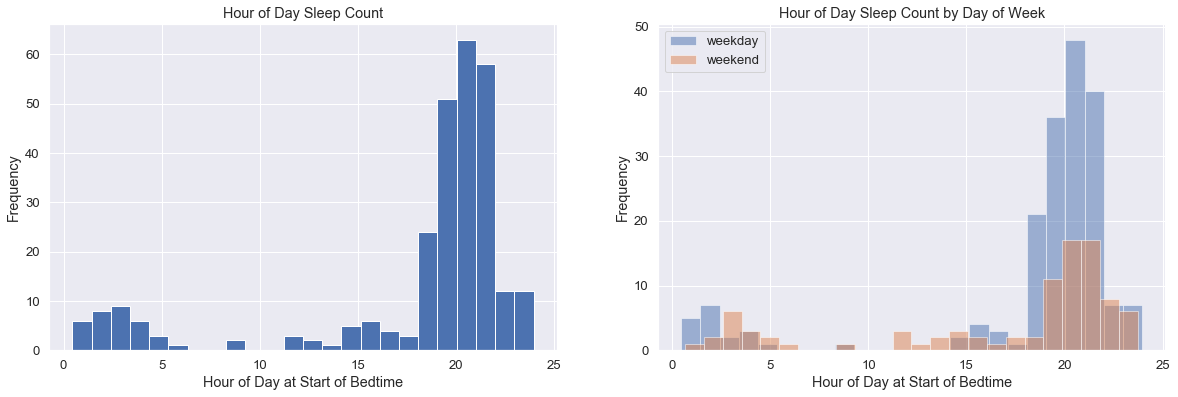

In [1549]:
start_df = (sleep_df['start_time'].dt.hour + sleep_df['start_time'].dt.minute/60 + sleep_df['start_time'].dt.second/3600)

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(121)
ax.set_xlabel('Hour of Day at Start of Bedtime')
ax.set_ylabel('Frequency')
ax.set_title('Hour of Day Sleep Count')
ax.hist(start_df, bins=24)

day_week_start_df = pd.concat([start_df, sleep_df['end_time'].dt.dayofweek], axis=1)
day_week_start_df.columns = ['start_hour', 'dayofweek']
day_week_start_df.at[day_week_start_df['dayofweek'] < 5, 'dayofweek'] = 'weekday'
day_week_start_df.at[((day_week_start_df['dayofweek'] == 5) | (day_week_start_df['dayofweek'] == 6)), 'dayofweek'] = 'weekend'
day_week_df = day_week_start_df.iloc[:,1]

ax2 = fig.add_subplot(122)
ax2.set_xlabel('Hour of Day at Start of Bedtime')
ax2.set_ylabel('Frequency')
ax2.set_title('Hour of Day Sleep Count by Day of Week')
ax2.hist(day_week_start_df[day_week_start_df['dayofweek'] == 'weekday'].iloc[:,0], bins=24, alpha=0.5, label='weekday')
ax2.hist(day_week_start_df[day_week_start_df['dayofweek'] == 'weekend'].iloc[:,0], bins=24, alpha=0.5, label='weekend')
ax2.legend()

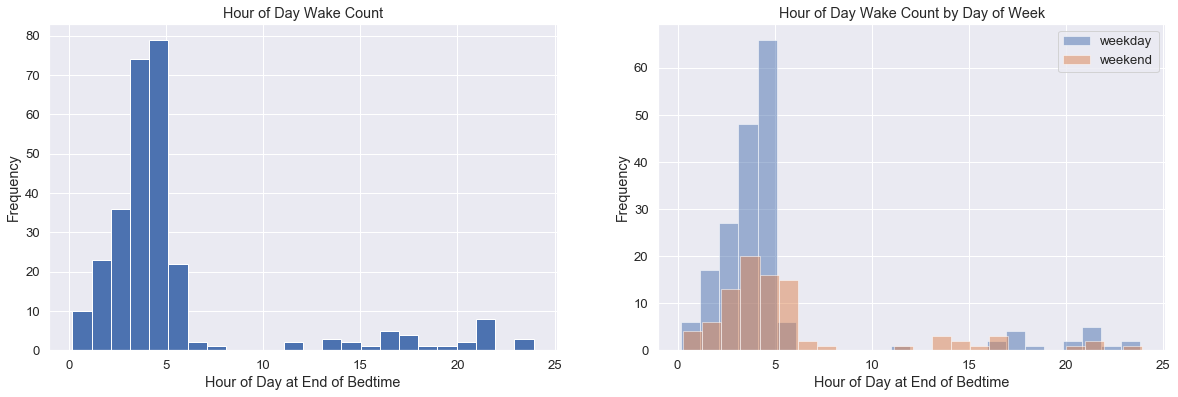

In [1550]:
end_df = (sleep_df['end_time'].dt.hour + sleep_df['end_time'].dt.minute/60 + sleep_df['end_time'].dt.second/3600)

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(121)
ax.set_xlabel('Hour of Day at End of Bedtime')
ax.set_ylabel('Frequency')
ax.set_title('Hour of Day Wake Count')
ax.hist(end_df, bins=24)

day_week_end_df = pd.concat([end_df, day_week_df], axis=1)

ax2 = fig.add_subplot(122)
ax2.set_xlabel('Hour of Day at End of Bedtime')
ax2.set_ylabel('Frequency')
ax2.set_title('Hour of Day Wake Count by Day of Week')
ax2.hist(day_week_end_df[day_week_end_df['dayofweek'] == 'weekday'].iloc[:,0], bins=24, alpha=0.5, label='weekday')
ax2.hist(day_week_end_df[day_week_end_df['dayofweek'] == 'weekend'].iloc[:,0], bins=24, alpha=0.5, label='weekend')
ax2.legend()

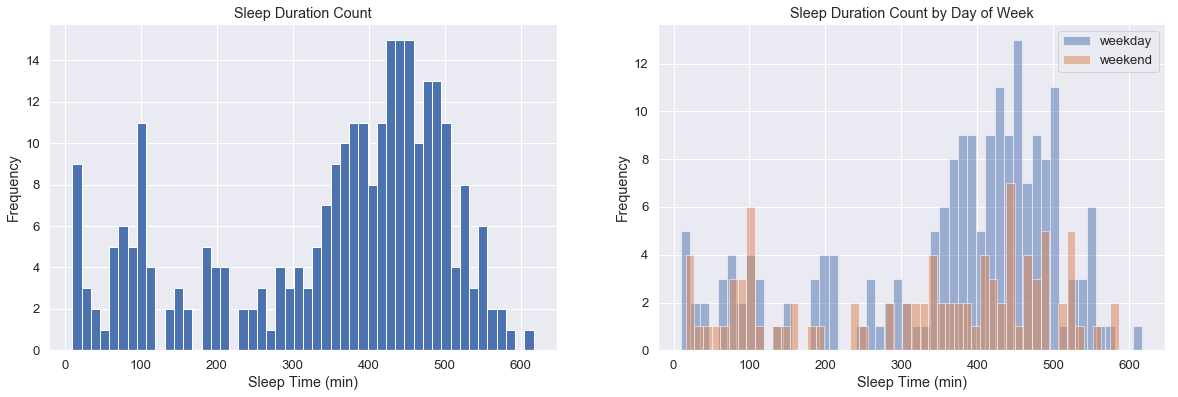

In [1551]:
duration_df = (end_df - start_df) * 60
duration_df[duration_df<0] = duration_df[duration_df<0] + 1440

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(121)
ax.set_xlabel('Sleep Time (min)')
ax.set_ylabel('Frequency')
ax.set_title('Sleep Duration Count')
ax.hist(duration_df, bins=50)

day_week_duration_df = pd.concat([duration_df, day_week_df], axis=1)

ax2 = fig.add_subplot(122)
ax2.set_xlabel('Sleep Time (min)')
ax2.set_ylabel('Frequency')
ax2.set_title('Sleep Duration Count by Day of Week')
ax2.hist(day_week_duration_df[day_week_duration_df['dayofweek'] == 'weekday'].iloc[:,0], bins=50, alpha=0.5, label='weekday')
ax2.hist(day_week_duration_df[day_week_duration_df['dayofweek'] == 'weekend'].iloc[:,0], bins=50, alpha=0.5, label='weekend')
ax2.legend()

In [1552]:
sleep_df.head()

Unnamed: 0  efficiency  has_sleep_data  \
0           0   92.663040             1.0   
1           1   87.788020             1.0   
2           2   90.026955             1.0   
3           3   93.162390             1.0   
4           4   93.750000             1.0   

      com.samsung.health.sleep.datauuid  quality  \
0  03f12ce0-9ade-5c74-9d57-686fd3966f2a  50003.0   
1  0419de25-ff8a-e425-0864-7e83b7f5d991      NaN   
2  048b90e0-1e31-7875-337c-e9d8c24bea59      NaN   
3  058e45d4-2bda-fc5f-6545-c965c65fea43      NaN   
4  059021fb-39a7-ab8c-e488-662743e11821      NaN   

   com.samsung.health.sleep.custom            end_time original_wake_up_time  \
0                              NaN 2018-03-08 01:30:00   2018-03-08 09:30:00   
1                              NaN 2018-02-25 05:28:00                   NaT   
2                              NaN 2018-06-02 03:49:00                   NaT   
3                              NaN 2018-06-23 04:32:00                   NaT   
4                              NaN 2018-01-05 05:41:00                   NaT   

           start_time time_offset             update_time   original_bed_time  \
0 2018-03-07 19:23:00    UTC-0400 2018-03-08 05:39:58.387 2018-03-08 03:23:00   
1 2018-02-24 22:15:00    UTC-0400 2018-02-25 05:30:16.332                 NaT   
2 2018-06-01 21:37:00    UTC-0300 2018-06-02 03:49:32.094                 NaT   
3 2018-06-23 00:39:00    UTC-0300 2018-06-23 04:47:26.337                 NaT   
4 2018-01-04 20:54:00    UTC-0400 2018-01-05 05:44:59.850                 NaT   

              create_time  original_efficiency time_delta  
0 2018-03-08 01:32:02.181             92.66304   04:00:00  
1 2018-02-25 05:30:16.332                  NaN   04:00:00  
2 2018-06-02 03:49:32.094                  NaN   03:00:00  
3 2018-06-23 04:47:26.337                  NaN   03:00:00  
4 2018-01-05 05:44:59.850                  NaN   04:00:00

In [1553]:
sleep_df['quality'].unique()
# What does this mean?? It is different from the efficiency column

array([50003.,    nan, 50004., 50005., 50002., 50001.])

In [1554]:
sleep_df[sleep_df['quality'].notnull()]
# Most of these have modified bed times and wake up times
# Quality column may be a user-entered sleep quality value, on a scale from 1 to 5

Unnamed: 0  efficiency  has_sleep_data  \
0             0   92.663040             1.0   
8             8   87.598946             1.0   
21           21   94.575050             1.0   
22           22   96.572580             1.0   
31           31   95.979900             1.0   
45           45   94.545456             1.0   
55           55   96.363630             1.0   
57           57   93.049330             1.0   
62           62   91.666670             1.0   
68           68   93.066666             1.0   
69           69   93.945720             1.0   
77           77   95.631065             1.0   
79           79   93.991420             1.0   
104         104   95.475110             1.0   
109         109   91.331924             1.0   
115         115   92.901880             1.0   
122         122   93.371216             1.0   
129         129   91.681114             1.0   
130         130   93.111110             1.0   
135         135   92.177590             1.0   
145         145   94.291756             1.0   
147         147   95.098040             1.0   
149         149   92.656586             1.0   
156         156    0.000000             NaN   
174         174   92.822970             1.0   
178         178   93.842890             1.0   
179         179   92.504570             1.0   
185         185   92.369480             1.0   
194         194   91.294640             1.0   
195         195   85.714290             1.0   
217         217   93.641624             1.0   
226         226   93.933050             1.0   
231         231   92.345680             1.0   
247         247   87.700530             1.0   
248         248   95.194084             1.0   
249         249   90.504450             1.0   
250         250   95.454544             1.0   
264         264    0.000000             NaN   

        com.samsung.health.sleep.datauuid  quality  \
0    03f12ce0-9ade-5c74-9d57-686fd3966f2a  50003.0   
8    095e5c43-db7b-eb38-9bc1-c8b37e55c9e8  50003.0   
21   161a352b-f9fd-1a38-b8ae-6ef0fa498d4b  50004.0   
22   16c97b07-7605-bb1b-22a1-b48d5ac17ef7  50005.0   
31   1e75a548-8b60-1bce-c183-c0dfd44e798d  50003.0   
45   28d482ea-9280-e6d6-4f83-13185c728a40  50004.0   
55   353533e6-8753-a564-e67e-171c0386c61c  50003.0   
57   35619088-ec69-e14e-8fa8-d0a210dd42e6  50003.0   
62   36f694bb-3931-d96d-90b0-fca8d63b2865  50003.0   
68   3dac1176-93ff-ca17-4708-b4a77ce543a4  50003.0   
69   3e03dec6-4722-38aa-eb47-65dc51c85f88  50003.0   
77   41f9b81f-5ad0-48a6-07a8-547a9f7edfd3  50004.0   
79   45422fc1-35a4-7645-ab48-a38c0d23bfa1  50004.0   
104  5bc2a601-0ba2-3239-33f6-16b94c826b80  50003.0   
109  6162f0db-d899-4efb-a471-ba8e5ecf6493  50003.0   
115  68d19a9c-c6fa-2fef-5c4f-cc04537fad19  50003.0   
122  702abd7b-c657-0d02-6629-eca30aabff59  50004.0   
129  74845709-7176-0c70-e120-4d65de63d21a  50002.0   
130  74cab487-a0cf-1c7e-924c-1179c42bf291  50003.0   
135  775e89c5-1a1e-cf80-a950-81104212dec9  50004.0   
145  7d0e7e5b-5421-dfe8-6f4d-8a7cf19c68f0  50004.0   
147  7f823e3e-609a-3a82-f972-28bd72ac3a62  50003.0   
149  81441feb-8762-ef69-65f4-e42b0c1cf435  50003.0   
156  8a774fff-3766-42ac-bbad-7a75dc508661  50002.0   
174  98e4dc75-823e-7112-cd1f-1f396b8e196a  50003.0   
178  9bb022f2-d800-9637-abb8-edd7a886ef00  50003.0   
179  9f26b15e-a686-f2be-b20a-88c991655ec9  50004.0   
185  a3eebb9e-2297-05e8-0bb6-63f1b450bc4e  50002.0   
194  ab433015-0bbc-f724-77ee-c5662a41bbe2  50003.0   
195  ac71b014-b737-4d4e-0198-1a9172fd65f8  50001.0   
217  bffd946f-f3ad-54ed-9fae-7351fb39e334  50004.0   
226  c61ff446-0772-176f-7c4b-05307096fba2  50004.0   
231  c9b3dc9d-18ab-bf72-a6b7-68c69ed3581f  50003.0   
247  dafff106-4d80-3d6b-00a8-40d61787fa12  50003.0   
248  df4f1a49-7723-0115-3462-f9b722478a4a  50004.0   
249  e0664096-575b-367f-4d30-18cceae78a25  50003.0   
250  e0a1661d-dad1-f571-10bb-15b668b56c2f  50004.0   
264  f0555b25-9fd9-403a-89fd-eeb01f567fbc  50001.0   

     com.samsung.health.sleep.custom            end_time  \
0   

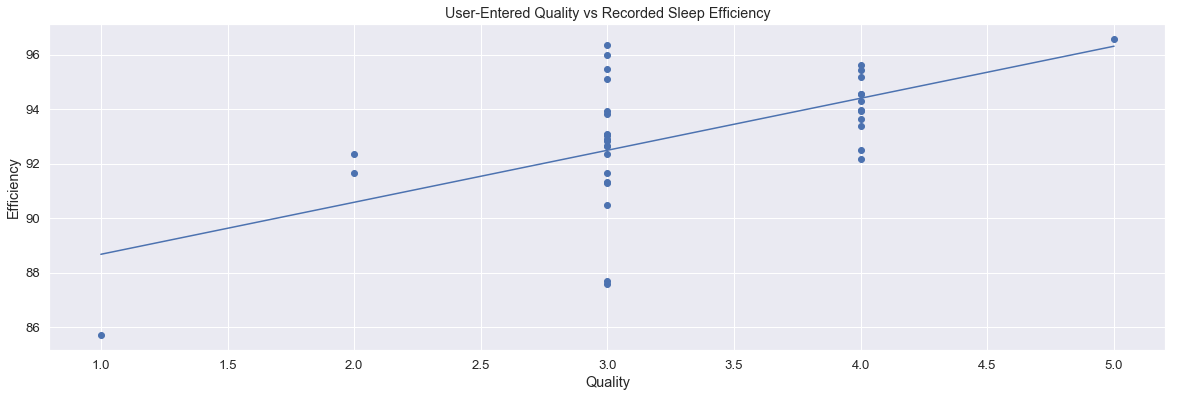

In [1555]:
eff_qual_df = sleep_df[sleep_df['quality'].notnull()][['efficiency', 'quality']]
eff_qual_df['quality'] = eff_qual_df['quality'] - 50000
eff_qual_df = eff_qual_df[eff_qual_df['efficiency']!=0]

fig = plt.figure(figsize=(20, 6))
plt.scatter(eff_qual_df['quality'], eff_qual_df['efficiency'])
plt.xlabel('Quality')
plt.ylabel('Efficiency')
plt.title('User-Entered Quality vs Recorded Sleep Efficiency')

plt.plot(np.unique(eff_qual_df['quality']), np.poly1d(np.polyfit(eff_qual_df['quality'], eff_qual_df['efficiency'], 1))(np.unique(eff_qual_df['quality'])))

# From this limited data comparing user-entered quality to recorded sleep efficiency, 
# a simple regression curve shows a positive correlation. 
# However, there are some points that have high deviations from the curve.

In [1556]:
sleep_df['efficiency'].mean()

88.85711181362005

In [1557]:
quality_df = sleep_df['efficiency'].copy()
dur_end_df = pd.concat([duration_df, sleep_df['end_time'].dt.date], axis=1)

In [1558]:
qual_end_df = pd.concat([quality_df, sleep_df['end_time'].dt.date], axis=1)
qual_end_df[qual_end_df['efficiency']==0]

efficiency    end_time
117         0.0  2018-04-28
138         0.0  2018-01-02
156         0.0  2018-05-06
160         0.0  2018-01-29
181         0.0  2018-01-29
183         0.0  2018-01-14
197         0.0  2018-01-02
264         0.0  2018-05-08

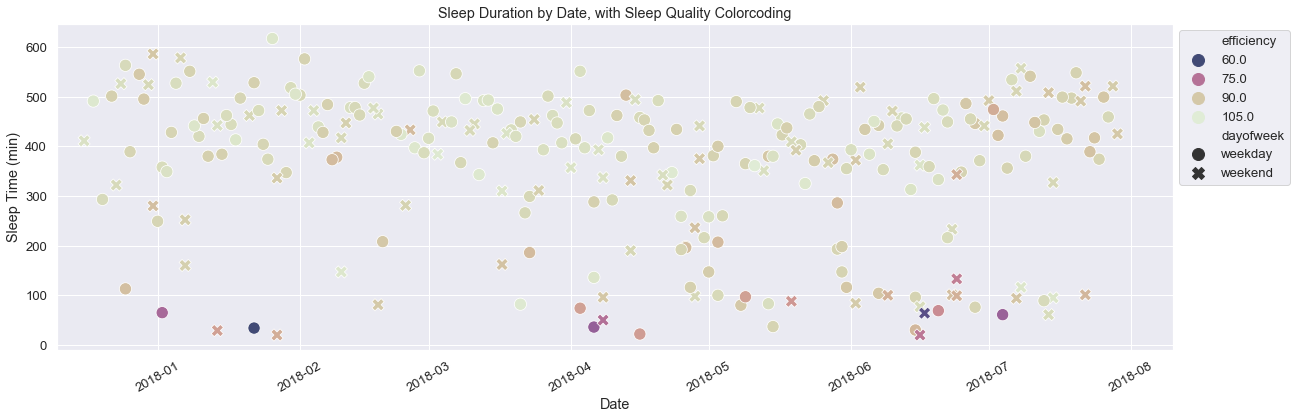

In [1559]:
fig = plt.figure(figsize=(20, 6))
palette = sns.cubehelix_palette(4, start=2, rot=1, dark=.3, light=.9, as_cmap=True, reverse=True)
ax = sns.scatterplot(data=dur_end_df, x='end_time',y=0, hue=quality_df[quality_df!=0], palette=palette, style=day_week_df, s=150)
ax = ax.set(xlabel='Date', ylabel='Sleep Time (min)', xlim=('2017-12-10', '2018-08-10'))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1), markerscale=2)
plt.title('Sleep Duration by Date, with Sleep Quality Colorcoding')
plt.show(ax)

# Points with efficiency == 0 are dropped from this plot

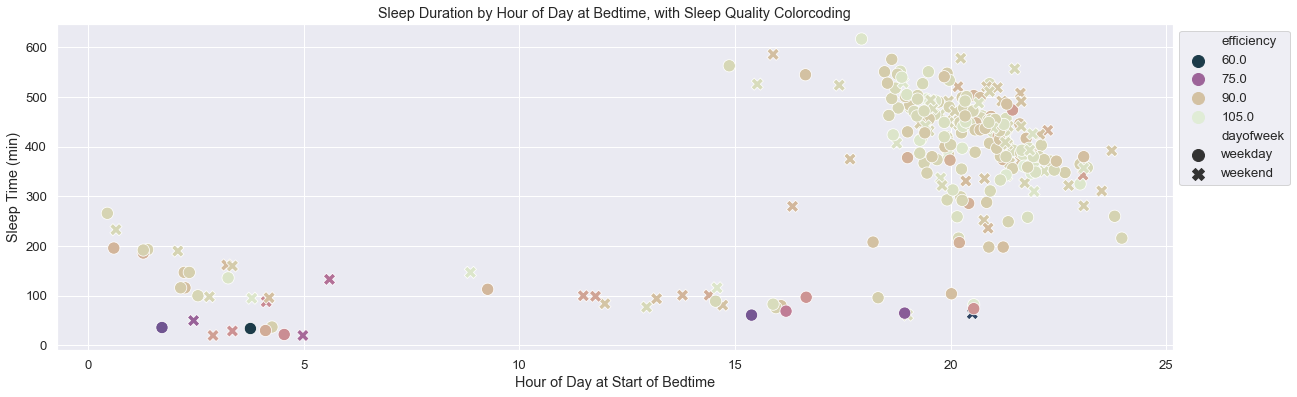

In [1560]:
fig = plt.figure(figsize=(20, 6))
palette = sns.cubehelix_palette(4, start=2, rot=1, dark=.2, light=.9, as_cmap=True, reverse=True)
ax = sns.scatterplot(data=pd.concat([duration_df, start_df], axis=1), x='start_time',y=0, hue=quality_df[quality_df!=0], palette=palette, style=day_week_df, s=150)
ax = ax.set(xlabel='Hour of Day at Start of Bedtime', ylabel='Sleep Time (min)')
plt.title('Sleep Duration by Hour of Day at Bedtime, with Sleep Quality Colorcoding')
plt.legend(bbox_to_anchor=(1, 1), markerscale=2)
plt.show(ax)

# Points with efficiency == 0 are dropped from this plot

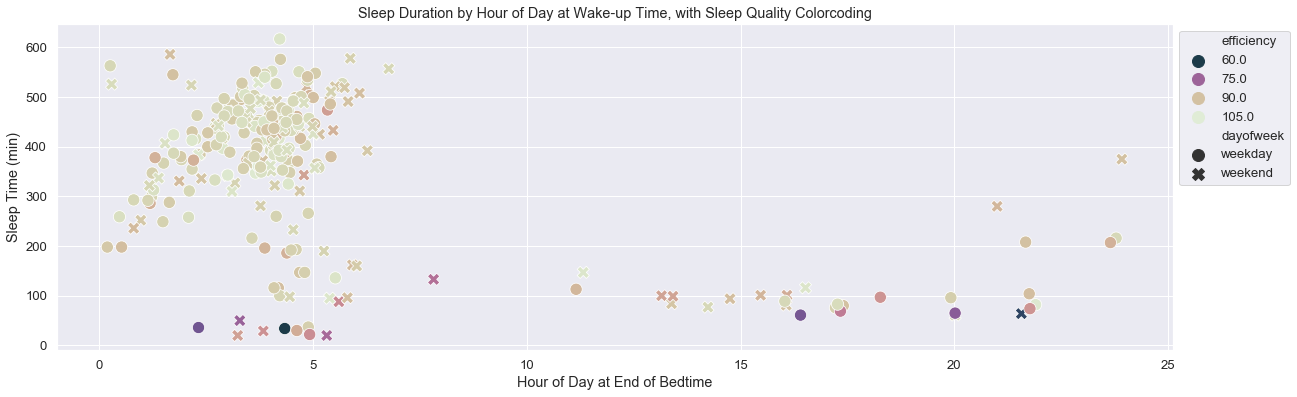

In [1561]:
fig = plt.figure(figsize=(20, 6))
palette = sns.cubehelix_palette(4, start=2, rot=1, dark=.2, light=.9, as_cmap=True, reverse=True)
ax = sns.scatterplot(data=pd.concat([duration_df, end_df], axis=1), x='end_time',y=0, hue=quality_df[quality_df!=0], palette=palette, style=day_week_df, s=150)
ax = ax.set(xlabel='Hour of Day at End of Bedtime', ylabel='Sleep Time (min)')
plt.title('Sleep Duration by Hour of Day at Wake-up Time, with Sleep Quality Colorcoding')
plt.legend(bbox_to_anchor=(1, 1), markerscale=2)
plt.show(ax)

# Points with efficiency == 0 are dropped from this plot

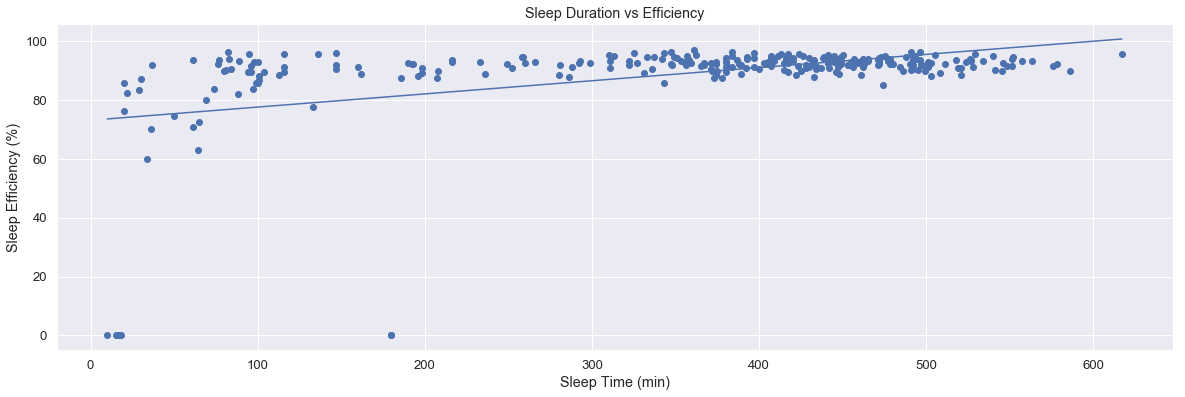

In [1562]:
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('Sleep Time (min)')
ax.set_ylabel('Sleep Efficiency (%)')
ax.set_title('Sleep Duration vs Efficiency')
ax.scatter(duration_df, quality_df)

plt.plot(np.unique(duration_df), np.poly1d(np.polyfit(duration_df, quality_df, 1))(np.unique(duration_df)))

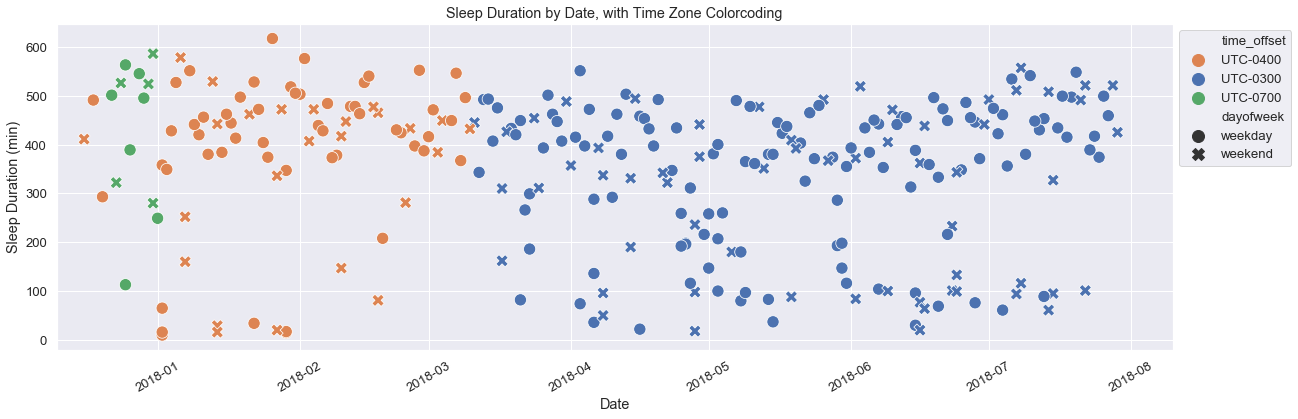

In [1563]:
fig = plt.figure(figsize=(20, 6))
palette = {"UTC-0300":"C0","UTC-0400":"C1","UTC-0700":"C2"}
ax = sns.scatterplot(data=pd.concat([duration_df, sleep_df['end_time'].dt.date], axis=1), x='end_time',y=0, hue=sleep_df['time_offset'], palette=palette, style=day_week_df, s=150)
ax = ax.set(xlabel='Date', ylabel='Sleep Duration (min)', xlim=('2017-12-10', '2018-08-10'))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1), markerscale=2)
plt.title('Sleep Duration by Date, with Time Zone Colorcoding')
plt.show(ax)

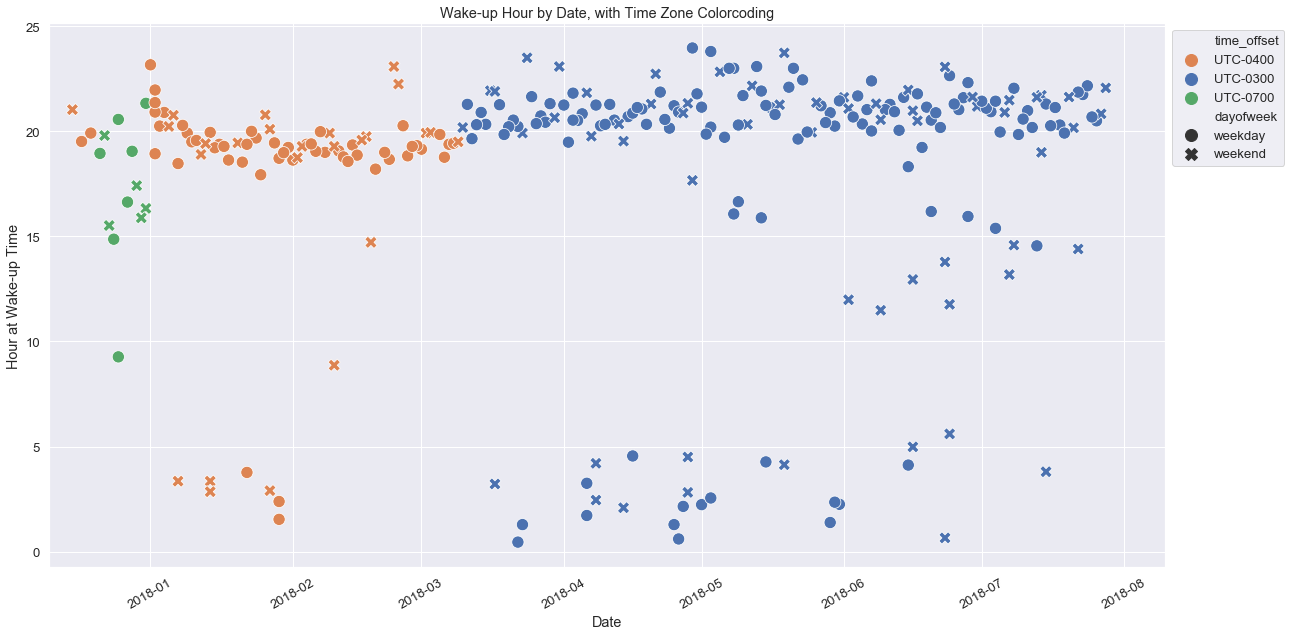

In [1564]:
sleep_date_df = pd.concat([start_df, sleep_df['start_time'].dt.date], axis=1)
sleep_date_df.columns = ['start_hour', 'start_date']

fig = plt.figure(figsize=(20, 10))
palette = {"UTC-0300":"C0","UTC-0400":"C1","UTC-0700":"C2"}
ax = sns.scatterplot(data=sleep_date_df, x='start_date',y='start_hour', hue=sleep_df['time_offset'], palette=palette, style=day_week_df, s=150)
ax = ax.set(xlabel='Date', ylabel='Hour at Wake-up Time', xlim=('2017-12-10', '2018-08-10'))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1), markerscale=2)
plt.title('Wake-up Hour by Date, with Time Zone Colorcoding')
plt.show(ax)

In [1565]:
sleep_df_num = np.array(mdates.date2num(sleep_df['start_time']))/365
sleep_df_num = pd.DataFrame(sleep_df_num)
sleep_df_num = pd.concat([sleep_df_num, start_df, sleep_df['time_offset']], axis=1)
sleep_df_num.columns = ['year', 'start_time', 'time_offset']
sleep_df_num = sleep_df_num.sort_values(by=['year']).reset_index(drop=True)

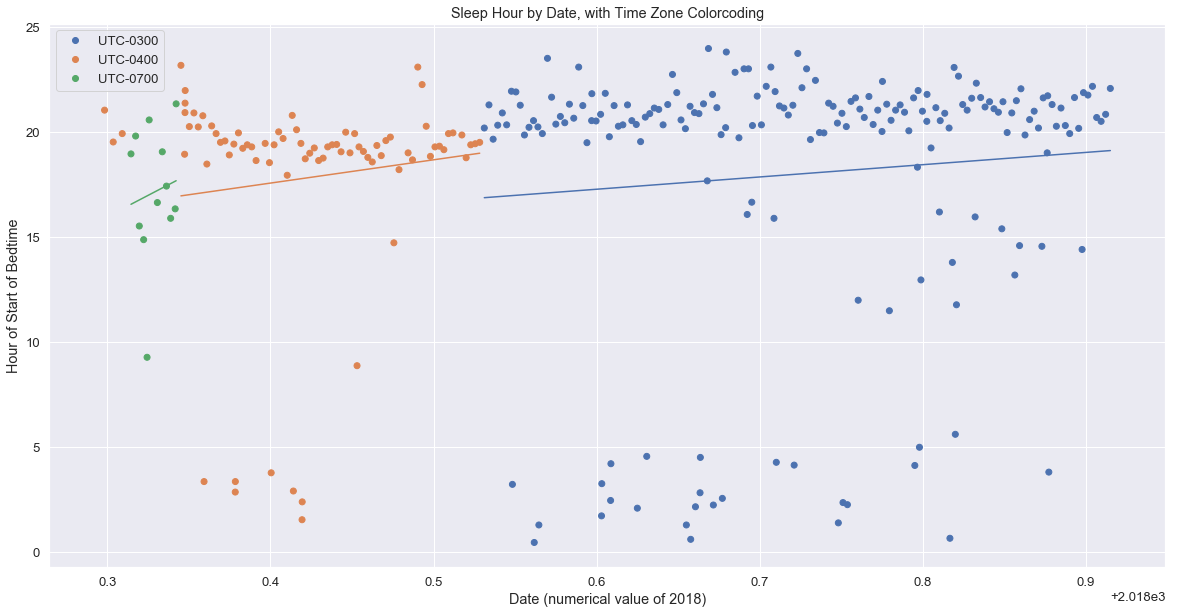

In [1566]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.set_xlabel('Date (numerical value of 2018)')
ax.set_ylabel('Hour of Start of Bedtime')
ax.set_title('Sleep Hour by Date, with Time Zone Colorcoding')

palette = {"UTC-0300":"C0","UTC-0400":"C1","UTC-0700":"C2"}

ax.scatter(sleep_df_num.iloc[:,0], sleep_df_num.iloc[:,1], c=sleep_df_num.iloc[:,2].apply(lambda x: palette[x]))
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in palette.values()]
plt.legend(markers, palette.keys(), numpoints=1)

plt.plot(np.unique(sleep_df_num.iloc[91:,0]), np.poly1d(np.polyfit(sleep_df_num.iloc[91:,0], sleep_df_num.iloc[91:,1], 1))(np.unique(sleep_df_num.iloc[91:,0])))
plt.plot(np.unique(sleep_df_num.iloc[15:91,0]), np.poly1d(np.polyfit(sleep_df_num.iloc[15:91,0], sleep_df_num.iloc[15:91,1], 1))(np.unique(sleep_df_num.iloc[15:91,0])))
plt.plot(np.unique(sleep_df_num.iloc[3:15,0]), np.poly1d(np.polyfit(sleep_df_num.iloc[3:15,0], sleep_df_num.iloc[3:15,1], 1))(np.unique(sleep_df_num.iloc[3:15,0])))

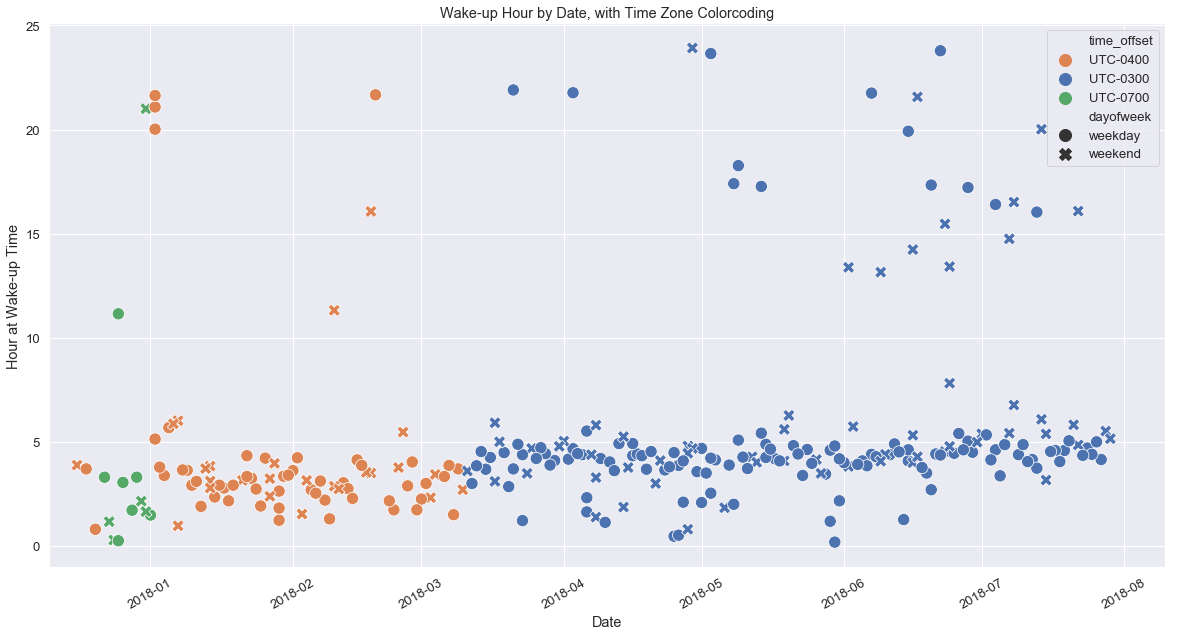

In [1567]:
wake_date_df = pd.concat([end_df, sleep_df['end_time'].dt.date], axis=1)
wake_date_df.columns = ['end_hour', 'end_date']

fig = plt.figure(figsize=(20, 10))
palette = {"UTC-0300":"C0","UTC-0400":"C1","UTC-0700":"C2"}
ax = sns.scatterplot(data=wake_date_df, x='end_date',y='end_hour', hue=sleep_df['time_offset'], palette=palette, style=day_week_df, s=150)
ax = ax.set(xlabel='Date', ylabel='Hour at Wake-up Time', xlim=('2017-12-10', '2018-08-10'))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1), markerscale=2)
plt.title('Wake-up Hour by Date, with Time Zone Colorcoding')
plt.show(ax)

In [1568]:
wake_df_num = np.array(mdates.date2num(sleep_df['end_time']))/365
wake_df_num = pd.DataFrame(wake_df_num)
wake_df_num = pd.concat([wake_df_num, end_df, sleep_df['time_offset']], axis=1)
wake_df_num.columns = ['year', 'end_time', 'time_offset']
wake_df_num = wake_df_num.sort_values(by=['year']).reset_index(drop=True)

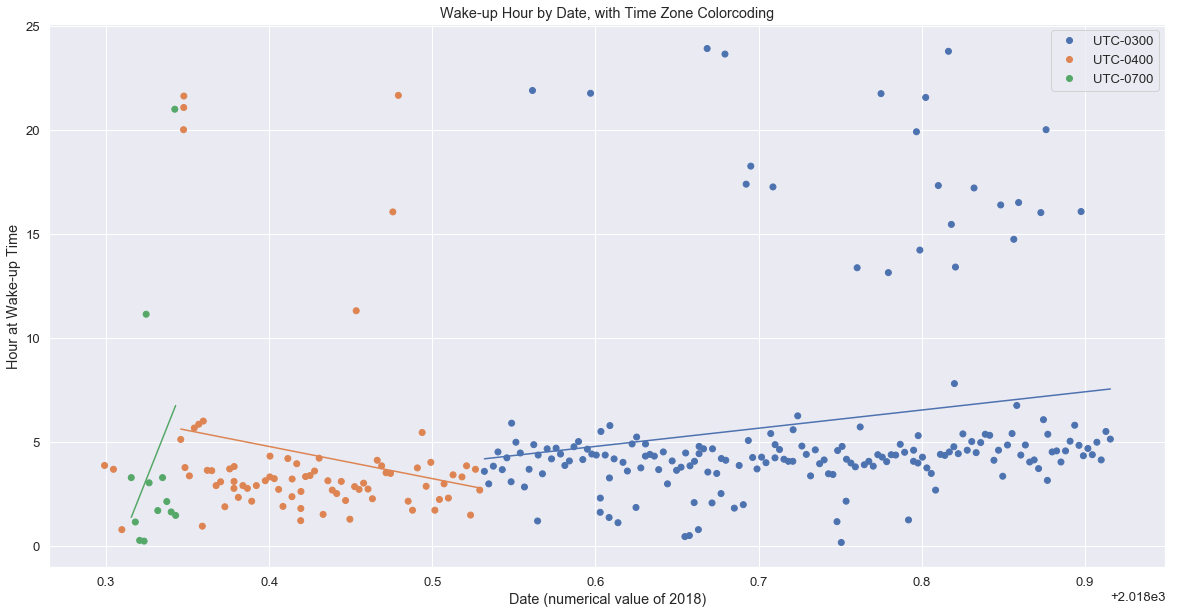

In [1569]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.set_xlabel('Date (numerical value of 2018)')
ax.set_ylabel('Hour at Wake-up Time')
ax.set_title('Wake-up Hour by Date, with Time Zone Colorcoding')

palette = {"UTC-0300":"C0","UTC-0400":"C1","UTC-0700":"C2"}

ax.scatter(wake_df_num.iloc[:,0], wake_df_num.iloc[:,1], c=wake_df_num.iloc[:,2].apply(lambda x: palette[x]))
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in palette.values()]
plt.legend(markers, palette.keys(), numpoints=1)

plt.plot(np.unique(wake_df_num.iloc[91:,0]), np.poly1d(np.polyfit(wake_df_num.iloc[91:,0], wake_df_num.iloc[91:,1], 1))(np.unique(wake_df_num.iloc[91:,0])))
plt.plot(np.unique(wake_df_num.iloc[15:91,0]), np.poly1d(np.polyfit(wake_df_num.iloc[15:91,0], wake_df_num.iloc[15:91,1], 1))(np.unique(wake_df_num.iloc[15:91,0])))
plt.plot(np.unique(wake_df_num.iloc[3:15,0]), np.poly1d(np.polyfit(wake_df_num.iloc[3:15,0], wake_df_num.iloc[3:15,1], 1))(np.unique(wake_df_num.iloc[3:15,0])))

### Observations
- Beginning of sleep time is normally distributed with right skew, the peak occuring around 9PM, for both weekday and weekend
- Wake-up time is normally distributed with left skew, with peak around 4-5AM, for both weekday and weekend


- Majority of sleep durations occur between 350mins and 550mins in a symmetrical normal distribution, with peak around 450mins (7.5 hours). Outside of this distribution at durations of 300min and less seem to be outliers to a normal night's sleep, which may include naps.
- Full night's rest within majority of sleep durations start mostly between 8-10PM
- Lower quality (efficiency) sleep (below 80%) occurs at lower sleep time durations less than about 150mins
- Less sleep durations occurred more frequently after mid-March 2018 after Daylight Savings


- During 12 days of datapoints within UTC-0700 timezone, the person sleep had some irregularity possible due to partying. After going back to UTC-0400 it took a few days to fix and go back to their normal sleep schedule.

______________________________

# Exercise Data Analysis

In [1570]:
exercise_df = pd.read_csv('../Project/exercise.csv')

In [1571]:
exercise_df.head()

Unnamed: 0                 end_time  altitude_loss  max_altitude  \
0           0  2018-04-07 17:40:40.673            NaN           NaN   
1           1  2018-01-27 10:08:00.000            NaN           NaN   
2           2  2018-05-01 18:12:20.915            NaN           NaN   
3           3  2018-02-24 13:50:02.929            NaN           NaN   
4           4  2018-03-16 17:25:39.584            NaN           NaN   

                start_time  count  altitude_gain  exercise_custom_type  \
0  2018-04-07 17:26:10.149    NaN            NaN                   NaN   
1  2018-01-27 09:38:00.000    0.0            NaN                   NaN   
2  2018-05-01 18:01:24.059    NaN            NaN                   NaN   
3  2018-02-24 13:35:13.243    NaN            NaN                   NaN   
4  2018-03-16 17:15:20.192    NaN            NaN                   NaN   

   duration  deviceuuid  max_heart_rate  max_rpm  mean_heart_rate  \
0    870524  F/D7+hL5E5             0.0      NaN              0.0   
1   1800000  jQfnryI8/B             NaN      NaN              NaN   
2    656856  F/D7+hL5E5             0.0      NaN              0.0   
3    889686  F/D7+hL5E5             0.0      NaN              0.0   
4    619392  F/D7+hL5E5             0.0      NaN              0.0   

                      pkg_name  max_cadence time_offset  \
0  com.sec.android.app.shealth          0.0    UTC-0300   
1  com.sec.android.app.shealth          NaN    UTC-0400   
2  com.sec.android.app.shealth          0.0    UTC-0300   
3  com.sec.android.app.shealth          0.0    UTC-0400   
4  com.sec.android.app.shealth          0.0    UTC-0300   

   mean_caloricburn_rate  incline_distance  exercise_type  decline_distance  \
0                    NaN               NaN           1001               NaN   
1                    NaN               NaN          14001               NaN   
2                    NaN               NaN           1001               NaN   
3                    NaN               NaN          11007               NaN   
4                    NaN               NaN           1001               NaN   

   max_speed  mean_power  max_power  mean_rpm  calorie  mean_cadence  \
0   1.588526         NaN        NaN       NaN   58.420           0.0   
1        NaN         NaN        NaN       NaN  252.000           NaN   
2   1.571783         NaN        NaN       NaN   43.850           0.0   
3        NaN         NaN        NaN       NaN  166.074           0.0   
4   1.611111         NaN        NaN       NaN   42.630           0.0   

   mean_speed              update_time  min_altitude  min_heart_rate  \
0    1.257754  2018-04-07 17:41:42.416           NaN             0.0   
1    0.000000  2018-01-27 10:09:23.176           NaN             NaN   
2    1.323111  2018-05-01 18:13:21.374           NaN             0.0   
3         NaN  2018-02-24 13:52:08.229           NaN             0.0   
4    1.413036  2018-03-16 17:26:39.581           NaN             0.0   

   count_type                                          live_data  \
0         NaN  009c4899-f8fb-c887-294a-045dcce7c880.live_data...   
1     30004.0                                                NaN   
2         NaN  020502c3-3cc7-8d33-f7bc-2d8e27609a47.live_data...   
3         NaN  0282b74e-1956-64c6-8ac9-5c44afdcb6c1.live_data...   
4         NaN  02c7f233-9af6-3288-e412-21747dcd9a98.live_data...   

   max_caloricburn_rate  custom comment  additional  distance  \
0                   NaN     NaN     NaN         NaN  1008.610   
1                   NaN     NaN     NaN         NaN     0.000   
2                   NaN     NaN     NaN         NaN   765.120   
3                   NaN     NaN     NaN         NaN       NaN   
4                   NaN     NaN     NaN         NaN   741.521   

                               datauuid              create_time  
0  009c4899-f8fb-c887-294a-045dcce7c880  2018-04-07 17:41:42.416  
1  013f807f-0b24-45da-9df7-446c2e297a4f  2018-01-27 10:08:40.225  
2  020502c3-3cc7-8d

In [1572]:
exercise_df['start_time'] = pd.to_datetime(exercise_df['start_time'])
exercise_df['end_time'] = pd.to_datetime(exercise_df['end_time'])

In [1573]:
exercise_df.drop(columns=['exercise_custom_type', 'max_rpm', 'pkg_name', 'mean_caloricburn_rate',  
                          'mean_power', 'max_power', 'mean_rpm', 'live_data', 'max_caloricburn_rate', 
                          'pkg_name', 'custom', 'additional', 'datauuid'])

Unnamed: 0                end_time  altitude_loss  max_altitude  \
0             0 2018-04-07 17:40:40.673            NaN           NaN   
1             1 2018-01-27 10:08:00.000            NaN           NaN   
2             2 2018-05-01 18:12:20.915            NaN           NaN   
3             3 2018-02-24 13:50:02.929            NaN           NaN   
4             4 2018-03-16 17:25:39.584            NaN           NaN   
5             5 2018-05-01 17:46:01.000            NaN           NaN   
6             6 2018-03-16 08:01:07.000            NaN           NaN   
7             7 2017-12-29 16:41:21.980            NaN           NaN   
8             8 2018-02-28 08:04:01.482            NaN           NaN   
9             9 2018-04-22 08:58:38.605            NaN           NaN   
10           10 2018-02-22 18:57:23.184            NaN      -112.719   
11           11 2018-03-23 09:44:04.809            NaN           NaN   
12           12 2018-02-26 07:53:52.089            NaN           NaN   
13           13 2018-01-06 16:30:00.000            NaN           NaN   
14           14 2018-04-24 08:26:00.000            NaN           NaN   
15           15 2018-01-06 17:01:55.685            NaN           NaN   
16           16 2018-04-20 07:47:52.722            NaN           NaN   
17           17 2018-04-05 20:39:37.000            NaN           NaN   
18           18 2018-04-10 08:06:12.000            NaN           NaN   
19           19 2018-01-29 08:10:06.243            NaN           NaN   
20           20 2018-01-14 07:55:00.000            NaN           NaN   
21           21 2018-01-19 08:11:46.845            NaN           NaN   
22           22 2018-02-16 21:09:43.366            NaN           NaN   
23           23 2018-03-12 07:50:00.000            NaN           NaN   
24           24 2018-05-02 07:54:14.616            NaN           NaN   
25           25 2018-04-22 07:49:50.101            NaN           NaN   
26           26 2018-02-12 07:41:02.000            NaN           NaN   
27           27 2018-03-28 21:08:02.000            NaN           NaN   
28           28 2018-02-24 14:01:41.242            NaN           NaN   
29           29 2018-03-23 09:11:55.223            NaN           NaN   
..          ...                     ...            ...           ...   
311         311 2018-04-07 17:40:39.000            NaN           NaN   
312         312 2018-04-02 16:40:13.302            NaN           NaN   
313         313 2018-04-05 20:39:36.420            NaN           NaN   
314         314 2017-12-20 17:05:27.593            NaN           NaN   
315         315 2018-01-01 15:25:55.930            NaN           NaN   
316         316 2018-01-07 18:20:45.162            NaN           NaN   
317         317 2018-01-18 18:38:40.996            NaN           NaN   
318         318 2018-03-05 07:47:41.000            NaN           NaN   
319         319 2018-01-10 14:29:00.000            NaN           NaN   
320         320 2018-02-13 07:48:43.983            NaN           NaN   
321         321 2018-04-26 07:47:20.000            NaN           NaN   
322         322 2018-02-04 08:02:30.583            NaN           NaN   
323         323 2018-03-25 15:27:29.000            NaN           NaN   
324         324 2018-04-14 11:37:10.722            NaN           NaN   
325         325 2018-01-07 14:05:38.876            NaN           NaN   
326         326 2018-01-03 16:13:07.240            NaN           NaN   
327         327 2018-04-23 20:23:43.000            NaN           NaN   
328         328 2018-03-07 21:06:48.985            NaN           NaN   
329         329 2017-12-24 12:13:36.663            NaN       271.397   
330         330 2018-04-27 07:53:31.000            NaN           NaN   
331         331 2018-02-21 21:04:08.000            NaN           NaN   
332         332 2018-04-22 18:40:16.489            NaN           NaN   
333         333 2018-04-02 16:42:04.000            NaN           NaN   
334         334 2018-01-19 18:46:10.841      

In [1574]:
exercise_df['comment'].unique()

array([nan, 'Azi'], dtype=object)

In [1575]:
exercise_df.at[exercise_df['exercise_type']==1001, 'exercise_type'] = 'Walking'
exercise_df.at[exercise_df['exercise_type']==1002, 'exercise_type'] = 'Running'
exercise_df.at[exercise_df['exercise_type']==11007, 'exercise_type'] = 'Cycling'
exercise_df.at[exercise_df['exercise_type']==13001, 'exercise_type'] = 'Hiking'
exercise_df.at[exercise_df['exercise_type']==14001, 'exercise_type'] = 'Swimming'
exercise_df.at[exercise_df['exercise_type']==15006, 'exercise_type'] = 'Elliptical'
exercise_df.at[exercise_df['exercise_type']==0, 'exercise_type'] = 'Other'

exercise_df.at[exercise_df['count_type']==30001, 'count_type'] = 'Stride'
exercise_df.at[exercise_df['count_type']==30004, 'count_type'] = 'Repetition'

In [1576]:
exercise_df[exercise_df['count']>0]

Unnamed: 0                end_time  altitude_loss  max_altitude  \
122         122 2017-03-06 10:22:41.693      26.255226     152.85818   
189         189 2017-11-28 17:03:05.366     100.594310     167.99841   

                 start_time   count  altitude_gain  exercise_custom_type  \
122 2017-03-06 10:05:28.618  2580.0      46.809795                   NaN   
189 2017-11-28 16:15:59.218  4525.0      72.629400                   NaN   

     duration  deviceuuid  max_heart_rate  max_rpm  mean_heart_rate  \
122   1018602  jQfnryI8/B             NaN      NaN              NaN   
189   2515029  jQfnryI8/B             NaN      NaN              NaN   

                        pkg_name  max_cadence time_offset  \
122  com.sec.android.app.shealth    170.51129    UTC-0400   
189  com.sec.android.app.shealth          NaN    UTC-0400   

     mean_caloricburn_rate  incline_distance exercise_type  decline_distance  \
122                    NaN             379.0       Running             161.0   
189                    NaN             720.0       Walking             646.0   

     max_speed  mean_power  max_power  mean_rpm  calorie  mean_cadence  \
122   3.082483         NaN        NaN       NaN    230.0     159.55493   
189   1.727394         NaN        NaN       NaN    246.0           NaN   

     mean_speed              update_time  min_altitude  min_heart_rate  \
122    2.899804  2017-03-06 10:28:01.065    128.303540             NaN   
189    1.499006  2017-11-28 17:04:23.826    115.736885             NaN   

    count_type                                          live_data  \
122     Stride  5f2df103-4494-4c42-be3b-1d612a947145.live_data...   
189     Stride  9774bcef-750a-47f9-9807-b31c867a022c.live_data...   

     max_caloricburn_rate  custom comment  additional  distance  \
122                   NaN     NaN     NaN         NaN    2950.0   
189                   NaN     NaN     NaN         NaN    3770.0   

                                 datauuid              create_time  
122  5f2df103-4494-4c42-be3b-1d612a947145  2017-03-06 10:05:28.624  
189  9774bcef-750a-47f9-9807-b31c867a022c  2017-11-28 16:15:59.250

In [1577]:
exercise_df['dayofweek'] = exercise_df['end_time'].dt.dayofweek
exercise_df.at[exercise_df['dayofweek'] < 5, 'dayofweek'] = 'weekday'
exercise_df.at[((exercise_df['dayofweek'] == 5) | (exercise_df['dayofweek'] == 6)), 'dayofweek'] = 'weekend'

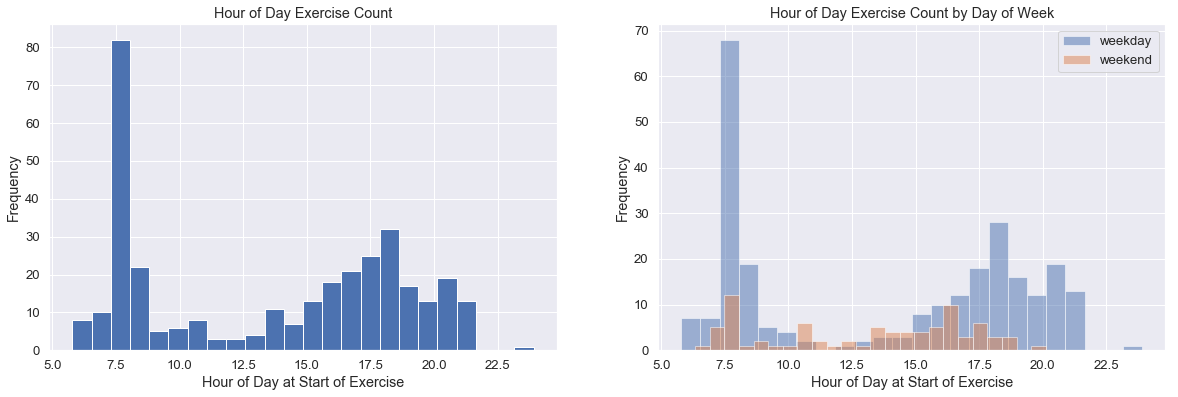

In [1578]:
start_exercise_df = (exercise_df['start_time'].dt.hour + exercise_df['start_time'].dt.minute/60 + exercise_df['start_time'].dt.second/3600)

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(121)
ax.set_xlabel('Hour of Day at Start of Exercise')
ax.set_ylabel('Frequency')
ax.set_title('Hour of Day Exercise Count')
ax.hist(start_exercise_df, bins=24)

day_week_start_df = pd.concat([start_exercise_df, exercise_df['dayofweek']], axis=1)

ax2 = fig.add_subplot(122)
ax2.set_xlabel('Hour of Day at Start of Exercise')
ax2.set_ylabel('Frequency')
ax2.set_title('Hour of Day Exercise Count by Day of Week')
ax2.hist(day_week_start_df[day_week_start_df['dayofweek'] == 'weekday'].iloc[:,0], bins=24, alpha=0.5, label='weekday')
ax2.hist(day_week_start_df[day_week_start_df['dayofweek'] == 'weekend'].iloc[:,0], bins=24, alpha=0.5, label='weekend')
ax2.legend()

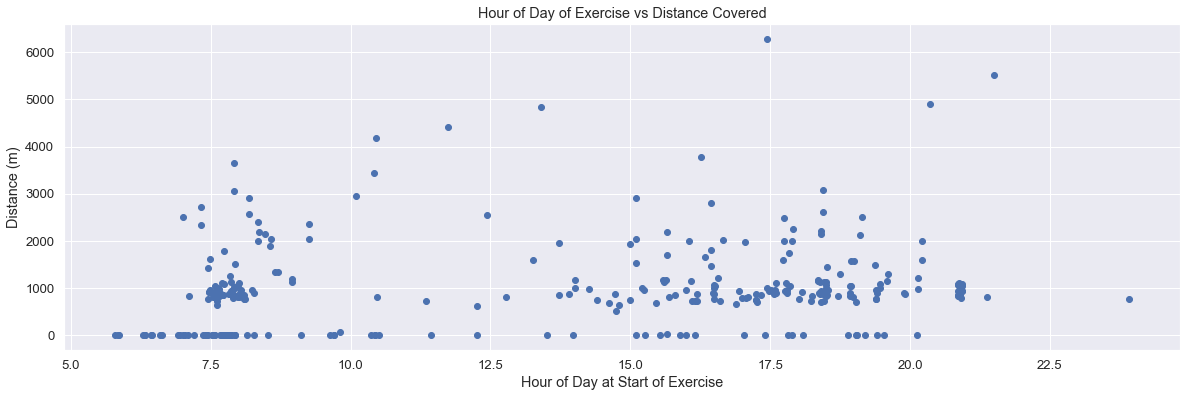

In [1579]:
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('Hour of Day at Start of Exercise')
ax.set_ylabel('Distance (m)')
ax.set_title('Hour of Day of Exercise vs Distance Covered')
ax.scatter(start_exercise_df, exercise_df['distance'])

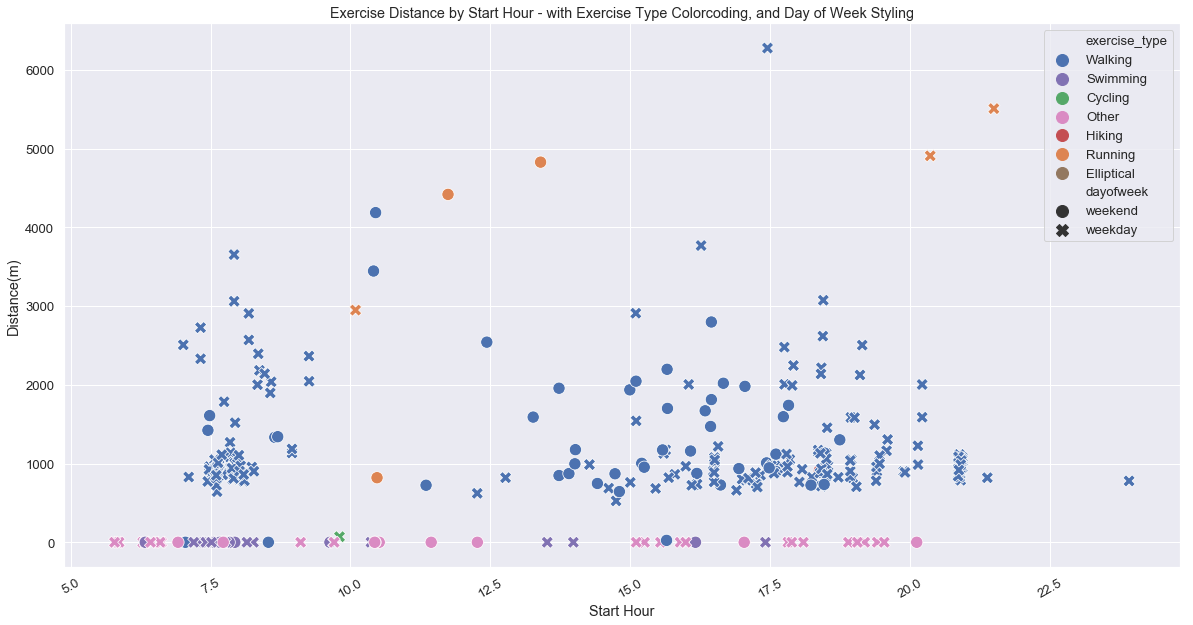

In [1580]:
distance_date = pd.concat([exercise_df['distance'], exercise_df['end_time'].dt.date], axis=1)
distance_date = pd.concat([distance_date, start_exercise_df], axis=1)

fig = plt.figure(figsize=(20, 10))
palette = {"Walking":"C0","Running":"C1","Cycling":"C2","Hiking":"C3","Swimming":"C4","Elliptical":"C5","Other":"C6"}
ax = sns.scatterplot(data=distance_date, x='start_time',y='distance', hue=exercise_df['exercise_type'], palette=palette, style=exercise_df['dayofweek'], s=150)
ax = ax.set(xlabel='Start Hour', ylabel='Distance(m)')
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1), markerscale=2)
plt.title('Exercise Distance by Start Hour - with Exercise Type Colorcoding, and Day of Week Styling')
plt.show(ax)

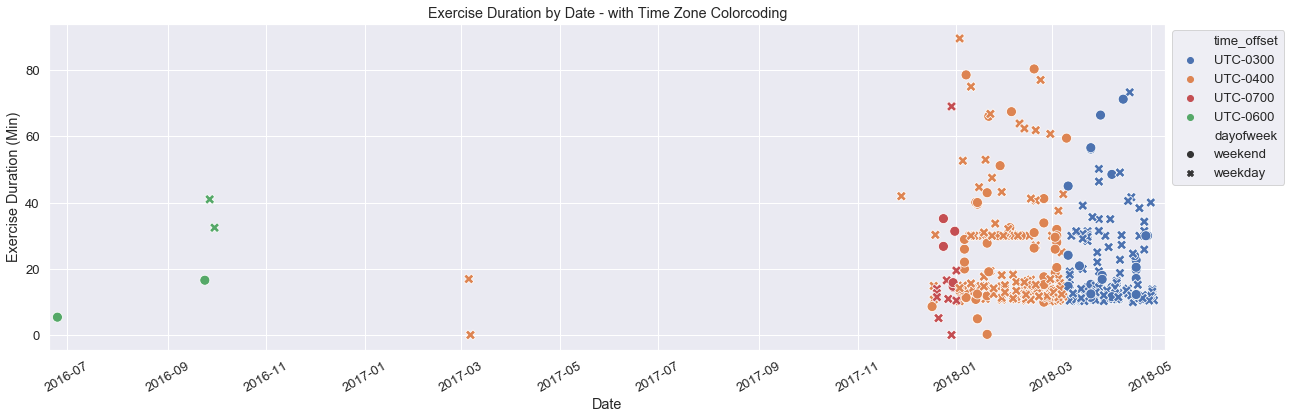

In [1581]:
ex_duration_df = pd.concat([exercise_df['duration']/60000, exercise_df['end_time'].dt.date], axis=1)

fig = plt.figure(figsize=(20, 6))
palette = {"UTC-0300":"C0","UTC-0400":"C1","UTC-0600":"C2", "UTC-0700":"C3"}
ax = sns.scatterplot(data=ex_duration_df, x='end_time',y='duration', hue=exercise_df['time_offset'], palette=palette, style=exercise_df['dayofweek'], s=100)
ax = ax.set(xlabel='Date', ylabel='Exercise Duration (Min)', xlim=('2016-06-20', '2018-05-10'))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Exercise Duration by Date - with Time Zone Colorcoding')
plt.show(ax)

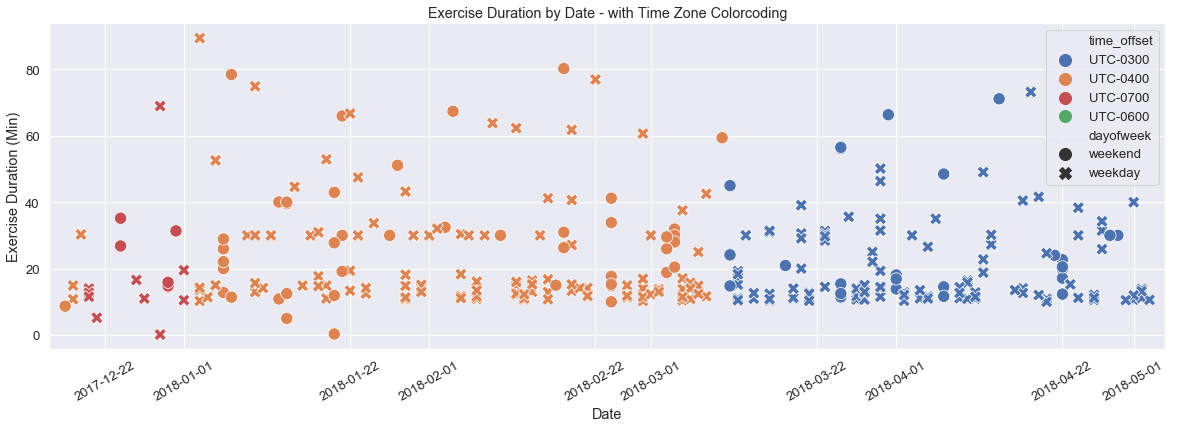

In [1582]:
# Same plot as above, but truncated sparse dates before 2017-12-15
fig = plt.figure(figsize=(20, 6))
palette = {"UTC-0300":"C0","UTC-0400":"C1","UTC-0600":"C2", "UTC-0700":"C3"}
ax = sns.scatterplot(data=ex_duration_df, x='end_time',y='duration', hue=exercise_df['time_offset'], palette=palette, style=exercise_df['dayofweek'], s=150)
ax = ax.set(xlabel='Date', ylabel='Exercise Duration (Min)', xlim=('2017-12-15', '2018-05-05'))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1), markerscale=2)
plt.title('Exercise Duration by Date - with Time Zone Colorcoding')
plt.show(ax)

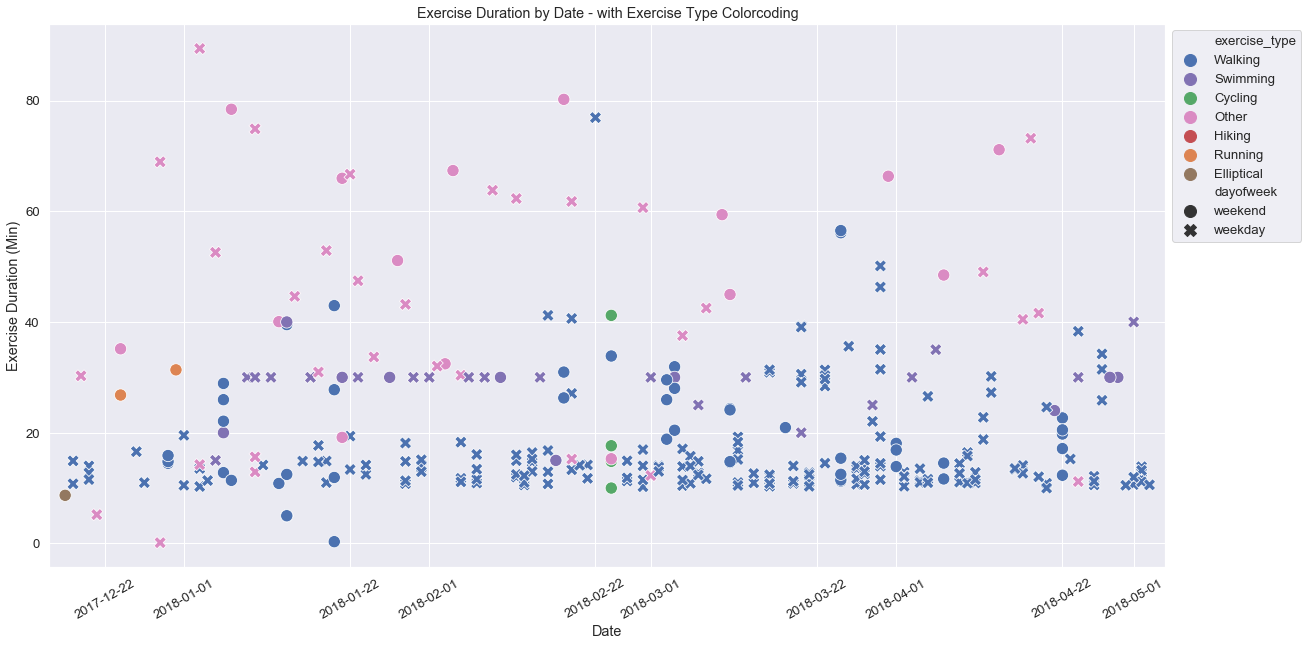

In [1583]:
fig = plt.figure(figsize=(20, 10))
palette = {"Walking":"C0","Running":"C1","Cycling":"C2","Hiking":"C3","Swimming":"C4","Elliptical":"C5","Other":"C6"}
ax = sns.scatterplot(data=ex_duration_df, x='end_time',y='duration', hue=exercise_df['exercise_type'], palette=palette, style=exercise_df['dayofweek'], s=150)
ax = ax.set(xlabel='Date', ylabel='Exercise Duration (Min)', xlim=('2017-12-15', '2018-05-05'))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1), markerscale=2)
plt.title('Exercise Duration by Date - with Exercise Type Colorcoding')
plt.show(ax)

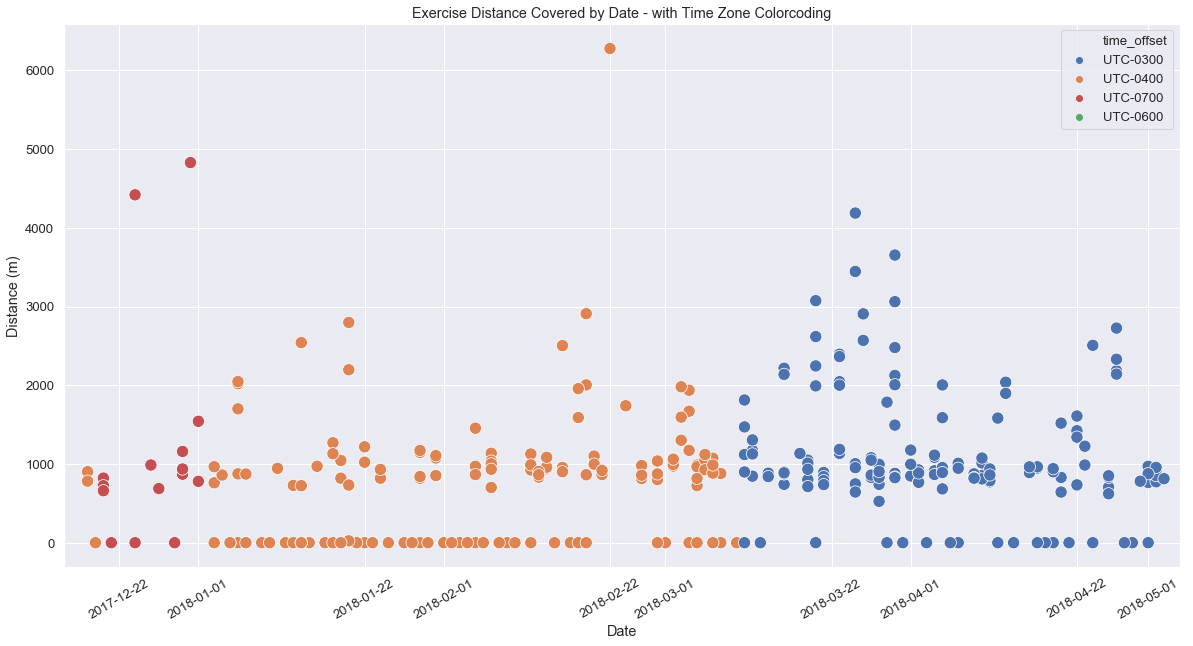

In [1584]:
fig = plt.figure(figsize=(20, 10))
palette = {"UTC-0300":"C0","UTC-0400":"C1","UTC-0600":"C2", "UTC-0700":"C3"}
ax = sns.scatterplot(data=distance_date, x='end_time',y='distance', hue=exercise_df['time_offset'], palette=palette, s=150)
ax = ax.set(xlabel='Date', ylabel='Distance (m)', xlim=('2017-12-15', '2018-05-05'))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Exercise Distance Covered by Date - with Time Zone Colorcoding')
plt.show(ax)

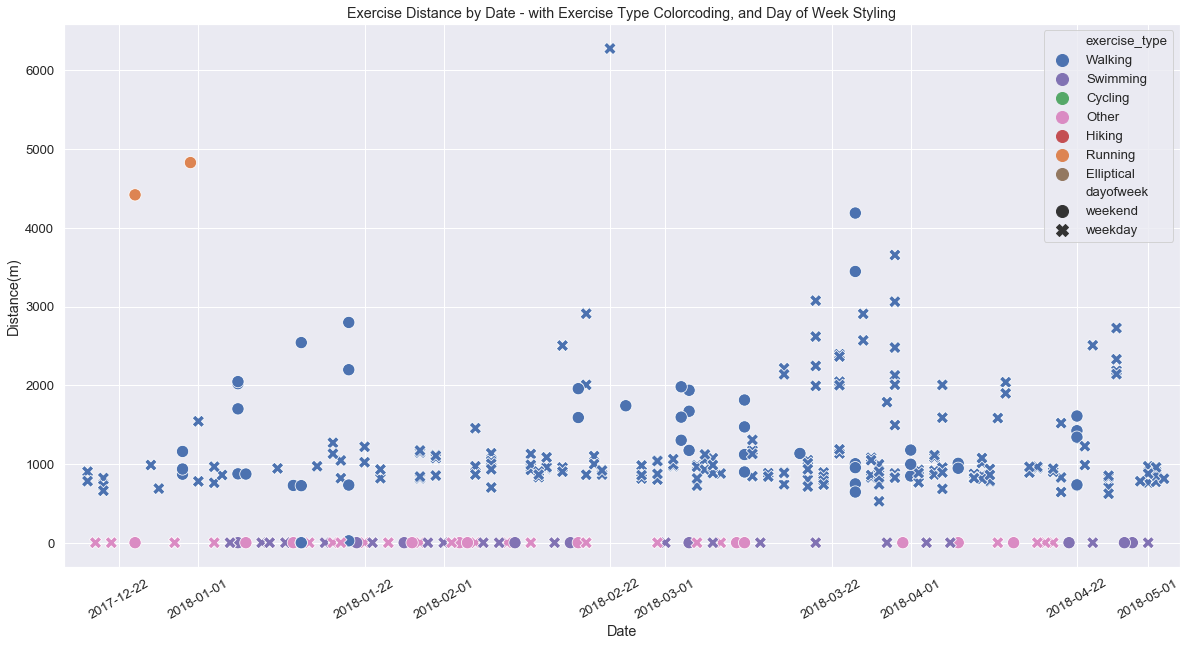

In [1585]:
fig = plt.figure(figsize=(20, 10))
palette = {"Walking":"C0","Running":"C1","Cycling":"C2","Hiking":"C3","Swimming":"C4","Elliptical":"C5","Other":"C6"}
ax = sns.scatterplot(data=distance_date, x='end_time',y='distance', hue=exercise_df['exercise_type'], palette=palette, style=exercise_df['dayofweek'], s=150)
ax = ax.set(xlabel='Date', ylabel='Distance(m)', xlim=('2017-12-15', '2018-05-05'))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1), markerscale=2)
plt.title('Exercise Distance by Date - with Exercise Type Colorcoding, and Day of Week Styling')
plt.show(ax)

In [1586]:
exercise_df['deviceuuid'].unique()

array(['F/D7+hL5E5', 'jQfnryI8/B'], dtype=object)

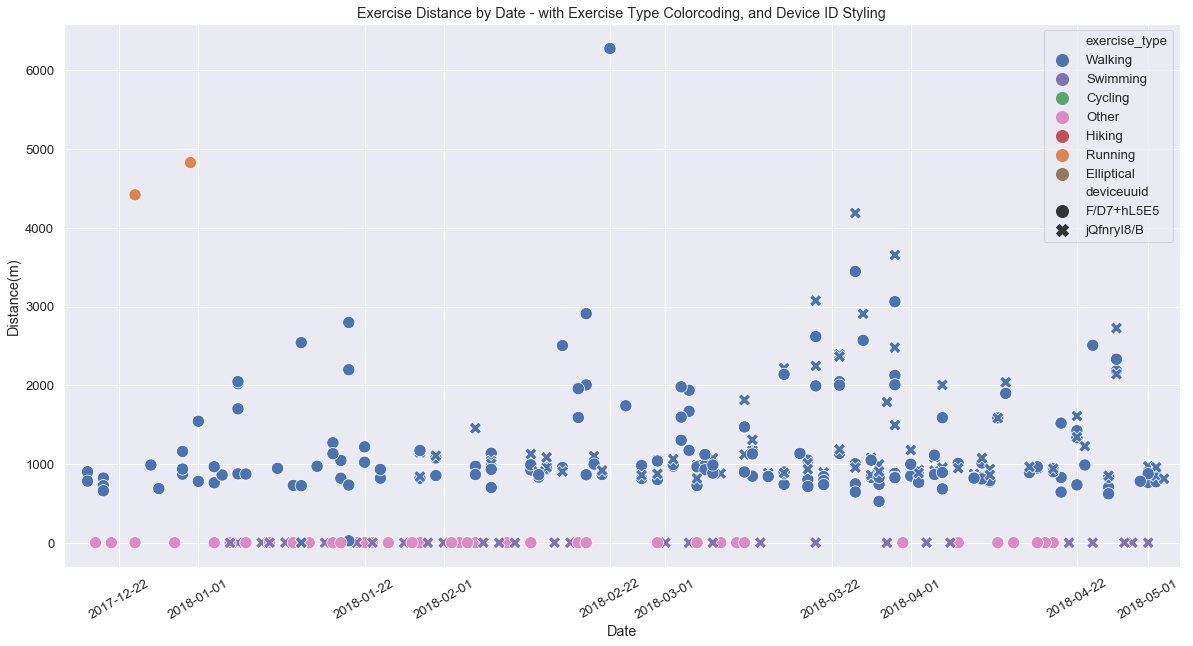

In [1587]:
fig = plt.figure(figsize=(20, 10))
palette = {"Walking":"C0","Running":"C1","Cycling":"C2","Hiking":"C3","Swimming":"C4","Elliptical":"C5","Other":"C6"}
ax = sns.scatterplot(data=distance_date, x='end_time',y='distance', hue=exercise_df['exercise_type'], palette=palette, style=exercise_df['deviceuuid'], s=150)
ax = ax.set(xlabel='Date', ylabel='Distance(m)', xlim=('2017-12-15', '2018-05-05'))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1), markerscale=2)
plt.title('Exercise Distance by Date - with Exercise Type Colorcoding, and Device ID Styling')
plt.show(ax)

In [1588]:
# What is this person doing for his 'Other' exercises?
# They all cover 0 distance and are recorded by something other than a smartwatch - 
# We know this because their 'Swimming' exercises are likely recorded by a smartwatch
# They also record very high heart rates - they must be very intensive exercises

exercise_df[exercise_df['exercise_type'] == 'Other'].sort_values('end_time')

Unnamed: 0                end_time  altitude_loss  max_altitude  \
239         239 2017-12-19 15:36:59.371            NaN           NaN   
100         100 2017-12-21 19:30:06.710            NaN           NaN   
197         197 2017-12-24 12:51:46.961            NaN           NaN   
35           35 2017-12-29 15:15:34.817            NaN           NaN   
7             7 2017-12-29 16:41:21.980            NaN           NaN   
339         339 2018-01-03 08:16:16.426            NaN           NaN   
258         258 2018-01-03 20:40:55.492            NaN           NaN   
192         192 2018-01-05 19:46:32.174            NaN           NaN   
316         316 2018-01-07 18:20:45.162            NaN           NaN   
227         227 2018-01-10 10:49:37.975            NaN           NaN   
141         141 2018-01-10 13:26:04.995            NaN           NaN   
272         272 2018-01-10 20:19:40.667            NaN           NaN   
138         138 2018-01-13 08:22:20.541            NaN           NaN   
114         114 2018-01-15 07:22:03.388            NaN           NaN   
301         301 2018-01-18 06:56:39.218            NaN           NaN   
334         334 2018-01-19 18:46:10.841            NaN           NaN   
119         119 2018-01-21 08:06:38.226            NaN           NaN   
246         246 2018-01-21 17:45:22.738            NaN           NaN   
145         145 2018-01-22 18:55:47.777            NaN           NaN   
126         126 2018-01-23 09:54:04.671            NaN           NaN   
190         190 2018-01-25 06:25:37.428            NaN           NaN   
310         310 2018-01-28 08:34:50.124            NaN           NaN   
87           87 2018-01-29 07:00:32.795            NaN           NaN   
132         132 2018-02-02 08:24:33.467            NaN           NaN   
44           44 2018-02-03 11:03:21.739            NaN           NaN   
322         322 2018-02-04 08:02:30.583            NaN           NaN   
135         135 2018-02-05 07:06:18.241            NaN           NaN   
55           55 2018-02-09 07:30:50.854            NaN           NaN   
291         291 2018-02-12 20:34:43.656            NaN           NaN   
232         232 2018-02-18 21:27:27.343            NaN           NaN   
247         247 2018-02-19 09:57:52.849            NaN           NaN   
130         130 2018-02-19 19:07:28.891            NaN           NaN   
221         221 2018-02-24 10:31:21.699            NaN           NaN   
97           97 2018-02-28 07:20:39.444            NaN           NaN   
127         127 2018-03-01 16:42:12.882            NaN           NaN   
214         214 2018-03-05 06:24:43.199            NaN           NaN   
157         157 2018-03-08 06:32:46.933            NaN           NaN   
237         237 2018-03-10 11:25:49.088            NaN           NaN   
240         240 2018-03-11 12:11:36.103            NaN           NaN   
154         154 2018-03-31 08:53:04.299            NaN           NaN   
89           89 2018-04-07 08:31:05.100            NaN           NaN   
103         103 2018-04-12 08:24:19.203            NaN           NaN   
324         324 2018-04-14 11:37:10.722            NaN           NaN   
268         268 2018-04-17 16:40:03.688            NaN           NaN   
134         134 2018-04-18 20:15:48.937            NaN           NaN   
133         133 2018-04-19 16:35:14.680            NaN           NaN   
195         195 2018-04-24 13:43:22.243            NaN           NaN   

                 start_time  count  altitude_gain  exercise_custom_type  \
239 2017-12-19 15:06:26.046    NaN            NaN                   NaN   
100 2017-12-21 19:24:51.128    NaN            NaN                   NaN   
197 2017-12-24 12:16:05.548    NaN            NaN                   NaN   
35  2017-12-29 15:15:21.996    NaN            NaN                   NaN   
7   2017-12-29 15:32:24.297    NaN            NaN                   NaN   
339 2018-01-03 08:02:02.274    NaN            NaN                   NaN   
258 2018-01-03 19:11:25

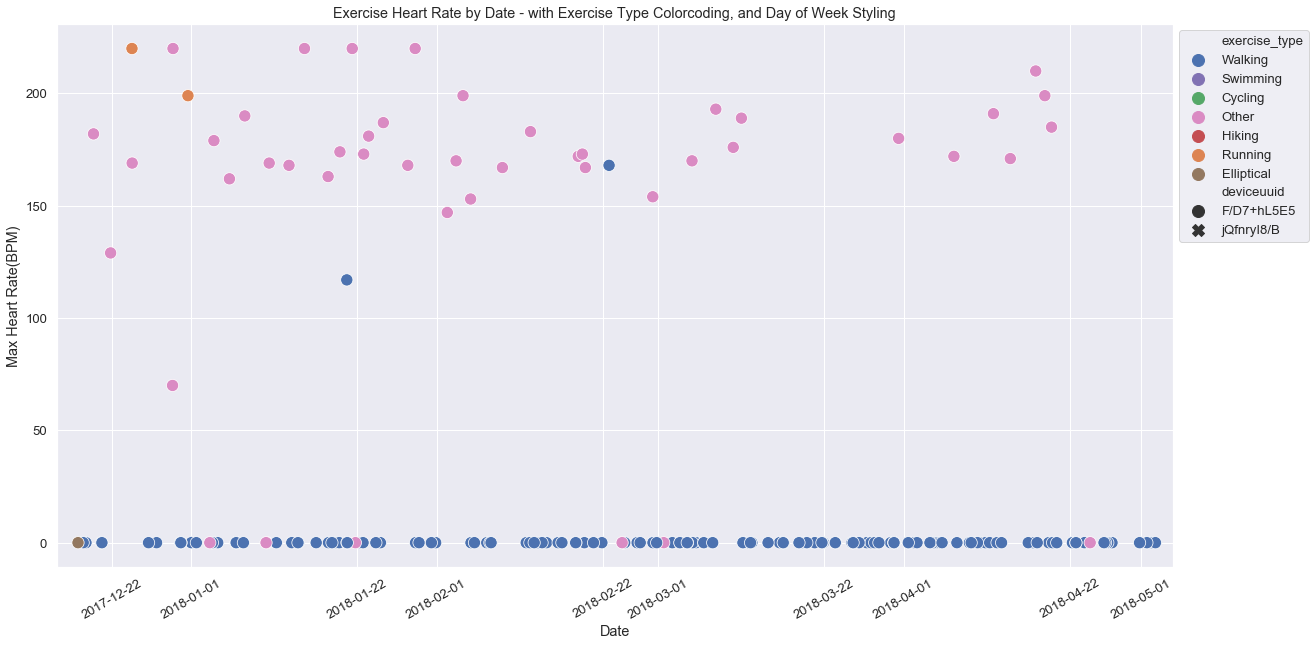

In [1589]:
fig = plt.figure(figsize=(20, 10))
palette = {"Walking":"C0","Running":"C1","Cycling":"C2","Hiking":"C3","Swimming":"C4","Elliptical":"C5","Other":"C6"}
ax = sns.scatterplot(data=exercise_df, x='end_time',y='max_heart_rate', hue='exercise_type', palette=palette, style='deviceuuid', s=150)
ax = ax.set(xlabel='Date', ylabel='Max Heart Rate(BPM)', xlim=('2017-12-15', '2018-05-05'))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1), markerscale=2)
plt.title('Exercise Heart Rate by Date - with Exercise Type Colorcoding, and Day of Week Styling')
plt.show(ax)

### Observations
- Most data occurs between late 2017 and early May 2018
- Majority of exercise occures at 7:30-8AM, very likely morning school/work commute time - Distance covered here is mostly around 1000m
- Majority of exercise duration falls below 20 minutes
- About a third of the data is recorded on a separate device - Swimming data is recorded exclusively with device 'jQfnryI8/B' suggesting a smartwatch. The other device is not a phone because it records heart rate as well.
- 'Other' exercise consists of high heart rate and 0 distance records - I have inferred that the person is most likely doing skipping rope exercises 


____________

# Heart Rate Data Analysis

In [1590]:
heart_rate_df = pd.read_csv('../Project/heart_rate.csv')

In [1591]:
heart_rate_df.head(10)

Unnamed: 0                 end_time  heart_rate binning_data  \
0           0  2017-12-16 04:30:29.450        60.0          NaN   
1           1  2017-12-16 05:50:29.380        56.0          NaN   
2           2  2017-12-30 02:08:16.211        55.0          NaN   
3           3  2018-01-15 14:47:37.175        62.0          NaN   
4           4  2017-12-16 02:20:29.470        47.0          NaN   
5           5  2016-07-03 01:29:08.880        68.0          NaN   
6           6  2017-12-19 15:38:54.920       164.0          NaN   
7           7  2018-04-19 16:11:00.403       144.0          NaN   
8           8  2017-12-15 23:30:29.876        54.0          NaN   
9           9  2018-01-28 02:00:59.497        50.0          NaN   

                start_time  heart_beat_count              update_time  max  \
0  2017-12-16 04:30:29.450                 1  2017-12-16 04:35:00.341  0.0   
1  2017-12-16 05:50:29.380                 1  2017-12-16 05:55:00.264  0.0   
2  2017-12-30 02:08:16.211                 1  2017-12-30 02:08:16.411  0.0   
3  2018-01-15 14:47:37.175                 1  2018-01-15 14:47:37.371  0.0   
4  2017-12-16 02:20:29.470                 1  2017-12-16 02:35:00.252  0.0   
5  2016-07-03 01:29:05.342                 0  2016-07-03 01:29:20.441  NaN   
6  2017-12-19 15:38:54.920                 1  2017-12-19 15:39:03.147  0.0   
7  2018-04-19 16:11:00.403                 1  2018-04-19 16:11:00.632  0.0   
8  2017-12-15 23:30:29.876                 1  2017-12-15 23:31:24.004  0.0   
9  2018-01-28 02:00:59.497                 1  2018-01-28 02:15:01.208  0.0   

   min                     pkg_name time_offset  \
0  0.0  com.sec.android.app.shealth    UTC-0400   
1  0.0  com.sec.android.app.shealth    UTC-0400   
2  0.0  com.sec.android.app.shealth    UTC-0700   
3  0.0  com.sec.android.app.shealth    UTC-0400   
4  0.0  com.sec.android.app.shealth    UTC-0400   
5  NaN  com.sec.android.app.shealth    UTC-0600   
6  0.0  com.sec.android.app.shealth    UTC-0400   
7  0.0  com.sec.android.app.shealth    UTC-0300   
8  0.0  com.sec.android.app.shealth    UTC-0400   
9  0.0  com.sec.android.app.shealth    UTC-0400   

                               datauuid              create_time  
0  00978ee8-6b03-16cb-7bba-d22949a728cb  2017-12-16 04:35:00.341  
1  038d68e5-ddb9-df1f-f52f-4f85c32cb95a  2017-12-16 05:55:00.264  
2  0423adf2-6d1f-6e23-276b-ec25462bf3d5  2017-12-30 02:08:16.411  
3  07dc6531-0aa6-1b07-df29-049197357434  2018-01-15 14:47:37.371  
4  0a32cb55-8257-d3ae-e87a-e38ecb14fe97  2017-12-16 02:35:00.252  
5  0b326048-9df5-43ff-95d6-c9b610f2899c  2016-07-03 01:29:20.441  
6  0cb61f3f-b315-fc09-3fcf-8af21dafe368  2017-12-19 15:38:55.162  
7  0cbe2fd8-81fe-7ad0-e013-cbbdeac5292d  2018-04-19 16:11:00.632  
8  0cc8b507-bbfe-25ce-1cae-77df241bcf17  2017-12-15 23:31:24.004  
9  0ccd2c6e-e99b-1550-a217-2d004fc6da63  2018-01-28 02:15:01.208

In [1592]:
heart_rate_df['start_time'] = pd.to_datetime(heart_rate_df['start_time'])
heart_rate_df['end_time'] = pd.to_datetime(heart_rate_df['end_time'])
heart_rate_df['update_time'] = pd.to_datetime(heart_rate_df['update_time'])
heart_rate_df['create_time'] = pd.to_datetime(heart_rate_df['create_time'])

In [1593]:
heart_rate_df[heart_rate_df['end_time'] != heart_rate_df['start_time']]

Unnamed: 0                end_time  heart_rate  \
5             5 2016-07-03 01:29:08.880        68.0   
28           28 2016-06-23 10:46:05.795        60.0   
41           41 2016-06-09 14:41:09.456        52.0   
57           57 2016-06-13 23:33:56.559        61.0   
61           61 2017-11-24 07:28:53.933        58.0   
83           83 2016-06-10 04:05:36.753        76.0   
85           85 2017-11-06 08:47:38.014        97.0   
89           89 2016-06-11 01:29:38.666        61.0   
91           91 2016-10-27 01:25:00.205        50.0   
122         122 2017-05-13 21:24:05.235        58.0   
127         127 2017-11-28 16:28:12.860       118.0   
129         129 2017-09-16 20:28:15.245        56.0   
151         151 2017-11-19 19:23:03.835        57.0   
165         165 2016-06-19 06:49:48.102        62.0   
167         167 2016-08-13 15:27:18.274        80.0   
168         168 2016-06-11 07:38:31.311        66.0   
170         170 2016-06-17 01:24:58.882        71.0   
172         172 2017-11-25 12:51:52.168        75.0   
184         184 2017-11-25 20:22:40.669        53.0   
196         196 2016-06-13 06:04:58.623        61.0   
210         210 2017-11-06 08:48:55.086        90.0   
213         213 2016-10-27 17:02:35.109        66.0   
221         221 2017-05-13 21:22:28.063        54.0   
235         235 2017-03-07 09:49:27.824        71.0   
236         236 2017-02-12 20:47:40.873        49.0   
239         239 2017-11-19 19:22:02.928        54.0   
256         256 2018-01-26 22:59:59.999        47.0   
264         264 2016-07-23 22:40:26.024        81.0   
294         294 2016-08-13 00:05:44.161        68.0   

                                          binning_data  \
5                                                  NaN   
28                                                 NaN   
41                                                 NaN   
57                                                 NaN   
61                                                 NaN   
83                                                 NaN   
85                                                 NaN   
89                                                 NaN   
91                                                 NaN   
122                                                NaN   
127                                                NaN   
129                                                NaN   
151                                                NaN   
165                                                NaN   
167                                                NaN   
168                                                NaN   
170                                                NaN   
172                                                NaN   
184                                                NaN   
196                                                NaN   
210                                                NaN   
213                                                NaN   
221                                                NaN   
235                                                NaN   
236                                                NaN   
239                                                NaN   
256  d3043bd4-642b-05c3-b1c2-13d3ce611958.binning_d...   
264                                                NaN   
294                                                NaN   

                 start_time  heart_beat_count             update_time    max  \
5   2016-07-03 01:29:05.342                 0 2016-07-03 01:29:20.441    NaN   
28  2016-06-23 10:46:00.660                 0 2016-06-23 10:46:10.279    NaN   
41  2016-06-09 14:41:04.783                 0 2016-06-09 14:41:38.226    NaN   
57  2016-06-13 23:33:32.882                 0 2016-06-13 23:34:03.373    NaN   
61  2017-11-24 07:28:47.812                 0 2017-11-24 07:29:32.661   58.0   
83  2016-06-10 04:05:33.590                 0 2016-06-10 04:05:45.925    NaN   
85  2017-11-06 08:47:32.436                 0 2017-11

In [1594]:
heart_rate_df.sort_values('end_time')

Unnamed: 0                end_time  heart_rate binning_data  \
230         230 1969-12-31 19:00:00.000        47.0          NaN   
123         123 1969-12-31 19:00:00.000        49.0          NaN   
41           41 2016-06-09 14:41:09.456        52.0          NaN   
83           83 2016-06-10 04:05:36.753        76.0          NaN   
89           89 2016-06-11 01:29:38.666        61.0          NaN   
168         168 2016-06-11 07:38:31.311        66.0          NaN   
196         196 2016-06-13 06:04:58.623        61.0          NaN   
57           57 2016-06-13 23:33:56.559        61.0          NaN   
170         170 2016-06-17 01:24:58.882        71.0          NaN   
165         165 2016-06-19 06:49:48.102        62.0          NaN   
28           28 2016-06-23 10:46:05.795        60.0          NaN   
5             5 2016-07-03 01:29:08.880        68.0          NaN   
264         264 2016-07-23 22:40:26.024        81.0          NaN   
294         294 2016-08-13 00:05:44.161        68.0          NaN   
167         167 2016-08-13 15:27:18.274        80.0          NaN   
91           91 2016-10-27 01:25:00.205        50.0          NaN   
213         213 2016-10-27 17:02:35.109        66.0          NaN   
236         236 2017-02-12 20:47:40.873        49.0          NaN   
235         235 2017-03-07 09:49:27.824        71.0          NaN   
221         221 2017-05-13 21:22:28.063        54.0          NaN   
122         122 2017-05-13 21:24:05.235        58.0          NaN   
129         129 2017-09-16 20:28:15.245        56.0          NaN   
85           85 2017-11-06 08:47:38.014        97.0          NaN   
210         210 2017-11-06 08:48:55.086        90.0          NaN   
239         239 2017-11-19 19:22:02.928        54.0          NaN   
151         151 2017-11-19 19:23:03.835        57.0          NaN   
61           61 2017-11-24 07:28:53.933        58.0          NaN   
172         172 2017-11-25 12:51:52.168        75.0          NaN   
184         184 2017-11-25 20:22:40.669        53.0          NaN   
127         127 2017-11-28 16:28:12.860       118.0          NaN   
..          ...                     ...         ...          ...   
60           60 2018-01-28 06:30:29.251        55.0          NaN   
242         242 2018-01-28 06:40:29.230        58.0          NaN   
128         128 2018-01-28 06:50:29.312        66.0          NaN   
150         150 2018-01-28 07:01:02.617        58.0          NaN   
237         237 2018-01-28 07:10:58.528        75.0          NaN   
20           20 2018-01-28 07:20:51.537        59.0          NaN   
252         252 2018-02-15 19:36:51.908        55.0          NaN   
260         260 2018-02-15 19:37:15.400        55.0          NaN   
120         120 2018-02-15 19:39:51.404        73.0          NaN   
244         244 2018-02-15 20:06:34.773        55.0          NaN   
143         143 2018-02-18 22:42:45.131        68.0          NaN   
169         169 2018-02-18 22:43:26.165        71.0          NaN   
208         208 2018-03-04 11:42:43.472        58.0          NaN   
141         141 2018-03-15 14:01:54.836        58.0          NaN   
288         288 2018-03-15 14:02:35.014        64.0          NaN   
253         253 2018-03-15 14:03:23.021        65.0          NaN   
97           97 2018-03-21 20:49:51.488        71.0          NaN   
278         278 2018-03-22 21:22:18.930        55.0          NaN   
96           96 2018-03-22 21:22:40.152        59.0          NaN   
51           51 2018-03-25 20:41:51.763        71.0          NaN   
102         102 2018-03-30 11:36:40.626        65.0          NaN   
162         162 2018-03-30 11:36:55.089        61.0          NaN   
126         126 2018-03-30 11:37:13.005        63.0          NaN   
12           12 2018-04-08 13:51:17.054        65.0          NaN   
274         274 2018-04-11 19:01:25.554        70.0          NaN   
115         115 2018-04-11 19:01:42.311        72.0          NaN   
100         100 2018-04-19 16:10:18.377       152.0          

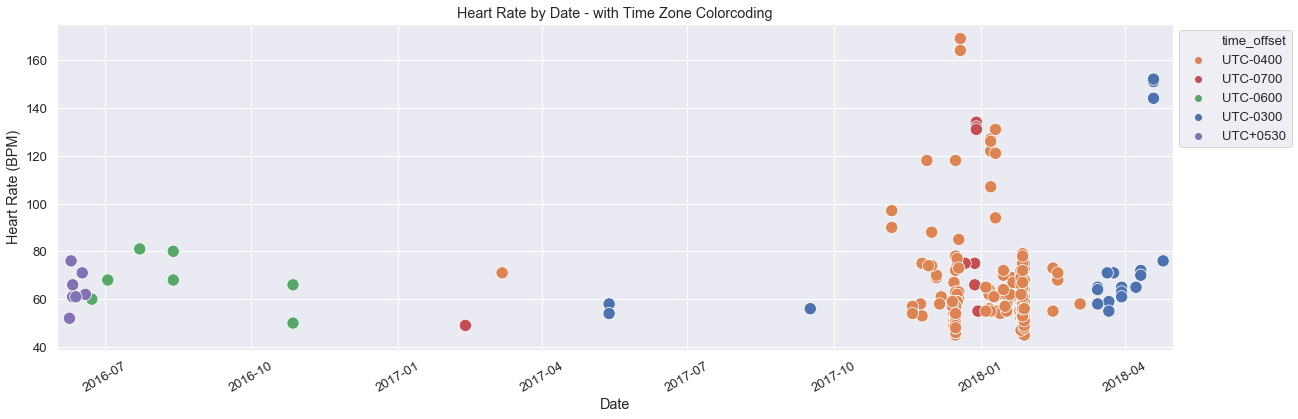

In [1595]:
fig = plt.figure(figsize=(20, 6))
palette = {"UTC-0300":"C0","UTC-0400":"C1","UTC-0600":"C2", "UTC-0700":"C3", "UTC+0530":"C4"}
ax = sns.scatterplot(data=pd.concat([heart_rate_df['heart_rate'], heart_rate_df['end_time'].dt.date], axis=1), x='end_time',y='heart_rate', hue=heart_rate_df['time_offset'], palette=palette, s=150)
ax = ax.set(xlabel='Date', ylabel='Heart Rate (BPM)', xlim=('2016-06-01', '2018-05-01'))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Heart Rate by Date - with Time Zone Colorcoding')
plt.show(ax)

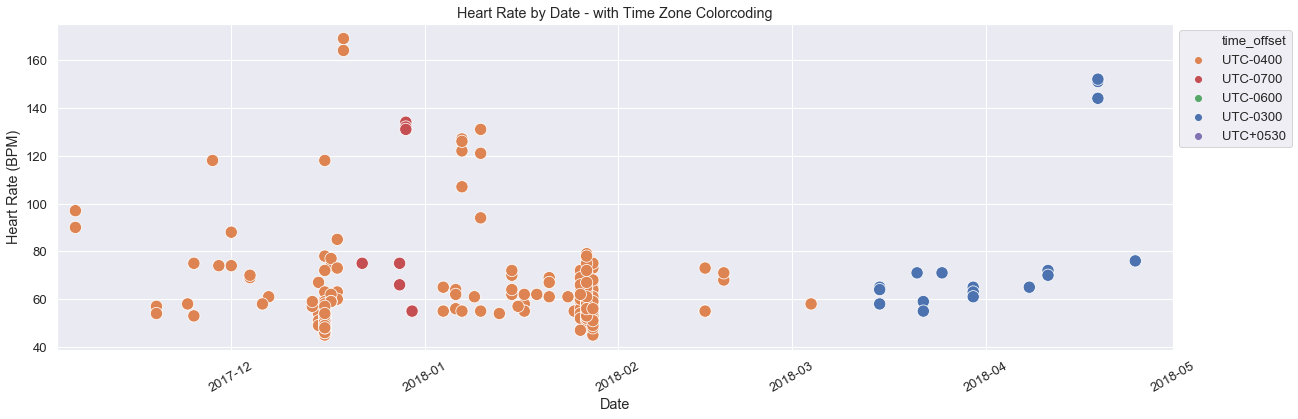

In [1596]:
# Same plot as above, but truncated sparse dates before 2017-11-03
fig = plt.figure(figsize=(20, 6))
palette = {"UTC-0300":"C0","UTC-0400":"C1","UTC-0600":"C2", "UTC-0700":"C3", "UTC+0530":"C4"}
ax = sns.scatterplot(data=pd.concat([heart_rate_df['heart_rate'], heart_rate_df['end_time'].dt.date], axis=1), x='end_time',y='heart_rate', hue=heart_rate_df['time_offset'], palette=palette, s=150)
ax = ax.set(xlabel='Date', ylabel='Heart Rate (BPM)', xlim=('2017-11-03', '2018-05-01'))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Heart Rate by Date - with Time Zone Colorcoding')
plt.show(ax)

### Observations
- Heart rate data is very sparse and sporadic. Most data points lie on about 4 days in late 2017 and early 2018, at a resting rate of ~45-80 BPM
- There is data from early June 2016 collected from within India's timezone, suggesting that this person has moved from there for work or school. There is also data to suggest that this person lived in a city with timezone UTC-0600/UTC-0700 (taking daylight savings into account) before moving to their current school/work city in UTC-0300/UTC-0400 around late February 2017. The person went back to the first city to visit in late 2017 for Christmas holidays. 

# Step Count Data Analysis

In [1597]:
step_count_df = pd.read_csv('../Project/step_count.csv')

In [1598]:
step_count_df.head(20)

Unnamed: 0                 end_time               start_time  count  \
0            0  2018-04-30 18:21:59.999  2018-04-30 18:21:00.000    101   
1            1  2018-04-13 19:47:59.999  2018-04-13 19:47:00.000     25   
2            2  2018-04-02 10:01:59.999  2018-04-02 10:01:00.000     38   
3            3  2018-04-27 10:52:59.999  2018-04-27 10:52:00.000     35   
4            4  2018-04-21 13:47:00.000  2018-04-21 13:46:00.000      0   
5            5  2018-04-01 08:31:00.000  2018-04-01 08:30:00.000     34   
6            6  2018-04-29 18:44:00.000  2018-04-29 18:43:00.000      8   
7            7  2018-04-09 08:30:59.999  2018-04-09 08:30:00.000     92   
8            8  2018-04-07 15:04:00.000  2018-04-07 15:03:00.000     21   
9            9  2018-04-12 19:03:00.000  2018-04-12 19:02:00.000    111   
10          10  2018-04-18 07:04:00.000  2018-04-18 07:03:00.000     65   
11          11  2018-04-17 12:31:59.999  2018-04-17 12:31:00.000     69   
12          12  2018-04-19 08:02:00.000  2018-04-19 08:01:00.000     89   
13          13  2018-04-17 20:58:00.000  2018-04-17 20:57:00.000    108   
14          14  2018-04-14 15:43:59.999  2018-04-14 15:43:00.000     49   
15          15  2018-04-01 00:04:59.999  2018-04-01 00:04:00.000     92   
16          16  2018-04-08 13:02:00.000  2018-04-08 13:01:00.000    112   
17          17  2018-04-15 18:27:59.999  2018-04-15 18:27:00.000     80   
18          18  2018-04-23 20:53:59.999  2018-04-23 20:53:00.000     14   
19          19  2018-04-11 07:49:59.999  2018-04-11 07:49:00.000     18   

     calorie              update_time     speed                     pkg_name  \
0   4.290000  2018-04-30 18:35:00.291  1.527778  com.sec.android.app.shealth   
1   0.960000  2018-04-13 19:55:00.251  1.027778  com.sec.android.app.shealth   
2   1.530000  2018-04-02 10:14:58.210  1.194444  com.sec.android.app.shealth   
3   1.450000  2018-04-27 10:55:01.281  1.500000  com.sec.android.app.shealth   
4   0.000000  2018-04-21 13:46:36.801  0.000000  com.sec.android.app.shealth   
5   1.820000  2018-04-01 08:35:05.481  2.222222  com.sec.android.app.shealth   
6   0.340000  2018-04-29 18:55:01.476  1.361111  com.sec.android.app.shealth   
7   3.870000  2018-04-09 08:32:42.712  1.444444  com.sec.android.app.shealth   
8   0.910000  2018-04-07 15:06:36.477  2.055556  com.sec.android.app.shealth   
9   4.440000  2018-04-12 19:14:59.507  1.500000  com.sec.android.app.shealth   
10  2.649999  2018-04-18 07:04:02.147  1.583354  com.sec.android.app.shealth   
11  3.030000  2018-04-17 12:35:00.378  1.472222  com.sec.android.app.shealth   
12  3.790000  2018-04-19 08:04:34.739  1.333333  com.sec.android.app.shealth   
13  5.020000  2018-04-17 21:10:10.111  1.444444  com.sec.android.app.shealth   
14  2.140000  2018-04-14 15:51:34.063  1.500000  com.sec.android.app.shealth   
15  3.950000  2018-04-01 00:15:02.270  1.416667  com.sec.android.app.shealth   
16  4.530000  2018-04-08 13:03:15.620  1.456500  com.sec.android.app.shealth   
17  3.300000  2018-04-15 18:35:00.228  1.416667  com.sec.android.app.shealth   
18  0.580000  2018-04-23 20:55:00.259  1.555556  com.sec.android.app.shealth   
19  0.770000  2018-04-11 07:55:01.246  1.583333  com.sec.android.app.shealth   

   time_offset   distance                              datauuid  \
0     UTC-0300  78.420000  0001af94-3253-4fec-0efc-153d3a8a2441   
1     UTC-0300  14.360000  0001c2a5-c751-4c86-456f-179d46bd29a9   
2     UTC-0300  24.190000  0003c0db-c795-1f80-17a4-582751b3a2ba   
3     UTC-0300  27.450000  0006c29c-72a3-b207-069e-b098a9f96252   
4     UTC-0300   0.000000  001e163d-0af5-4e9a-b7c9-a9ceb6ca5e8c   
5     UTC-0300  30.260000  002e1b20-fc3f-47d9-952d-fd27af36c925   
6     UTC-0300   6.310000  00301400-1f91-494f-a4f9-0d8c2a59c91b   
7     UTC-0300  70.320000  003676e0-bc74-ddc5-d8b6-1b7efb1b502f   
8     UTC-0300  17.630000  003a0915-1bc2-4f62-a5e2-18a70a231b32   
9     UTC-0300  87.660000  00470fd1-e6a4-46e2-8684-8aec4604579e   
10    UTC-

In [1599]:
step_count_df['start_time'] = pd.to_datetime(step_count_df['start_time'])
step_count_df['end_time'] = pd.to_datetime(step_count_df['end_time'])
step_count_df['update_time'] = pd.to_datetime(step_count_df['update_time'])
step_count_df['create_time'] = pd.to_datetime(step_count_df['create_time'])

step_count_df['step_date'] = step_count_df['end_time'].dt.date
step_count_df['step_hour'] = step_count_df['end_time'].dt.hour 

In [1600]:
step_count_df['time_offset'].unique()

array(['UTC-0300'], dtype=object)

In [1601]:
# Average speed during movement
step_count_df[step_count_df['speed']>0]['speed'].mean()

1.4277702766152778

In [1602]:
step_count_df['dayofweek'] = step_count_df['end_time'].dt.dayofweek
step_count_df.at[step_count_df['dayofweek'] < 5, 'dayofweek'] = 'weekday'
step_count_df.at[((step_count_df['dayofweek'] == 5) | (step_count_df['dayofweek'] == 6)), 'dayofweek'] = 'weekend'

In [1603]:
agg_func = {'start_time': 'first', 
            'end_time': 'last', 
            'count': 'sum',
            'calorie': 'sum', 
            'speed': 'mean',
            'distance': 'sum',
            'dayofweek': 'first'}
step_count_merged_day = step_count_df.groupby(['step_date']).aggregate(agg_func)

step_count_merged_day['end_date'] = step_count_merged_day['end_time'].dt.date

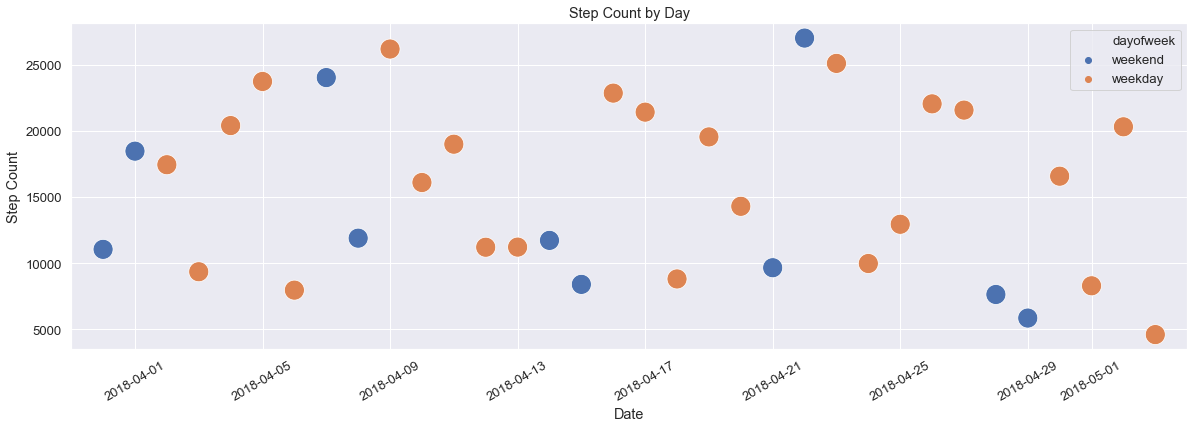

In [1604]:
fig = plt.figure(figsize=(20, 6))
ax = sns.scatterplot(data=step_count_merged_day, x='end_date', y='count', hue='dayofweek', s=400)
ax = ax.set(xlabel='Date', ylabel='Step Count', xlim=('2018-03-30', '2018-05-04'))
plt.xticks(rotation=30)
plt.title('Step Count by Day')
plt.show(ax)

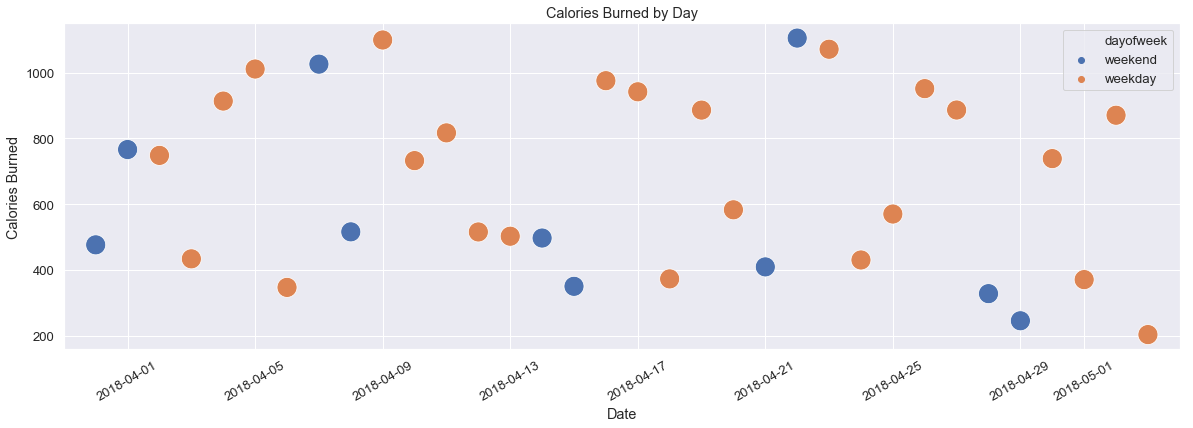

In [1605]:
fig = plt.figure(figsize=(20, 6))
ax = sns.scatterplot(data=step_count_merged_day, x='end_date', y='calorie', hue='dayofweek', s=400)
ax = ax.set(xlabel='Date', ylabel='Calories Burned', xlim=('2018-03-30', '2018-05-04'))
plt.xticks(rotation=30)
plt.title('Calories Burned by Day')
plt.show(ax)

In [1606]:
agg_func = {'start_time': 'first', 
            'end_time': 'last', 
            'count': 'sum',
            'calorie': 'sum', 
            'speed': 'mean',
            'distance': 'sum'}
step_count_merged_hour = step_count_df.groupby(['step_date', 'step_hour']).aggregate(agg_func)

step_count_merged_hour['end_date'] = step_count_merged_hour['end_time'].dt.date
step_count_merged_hour = step_count_merged_hour.reset_index(level=['step_hour'])

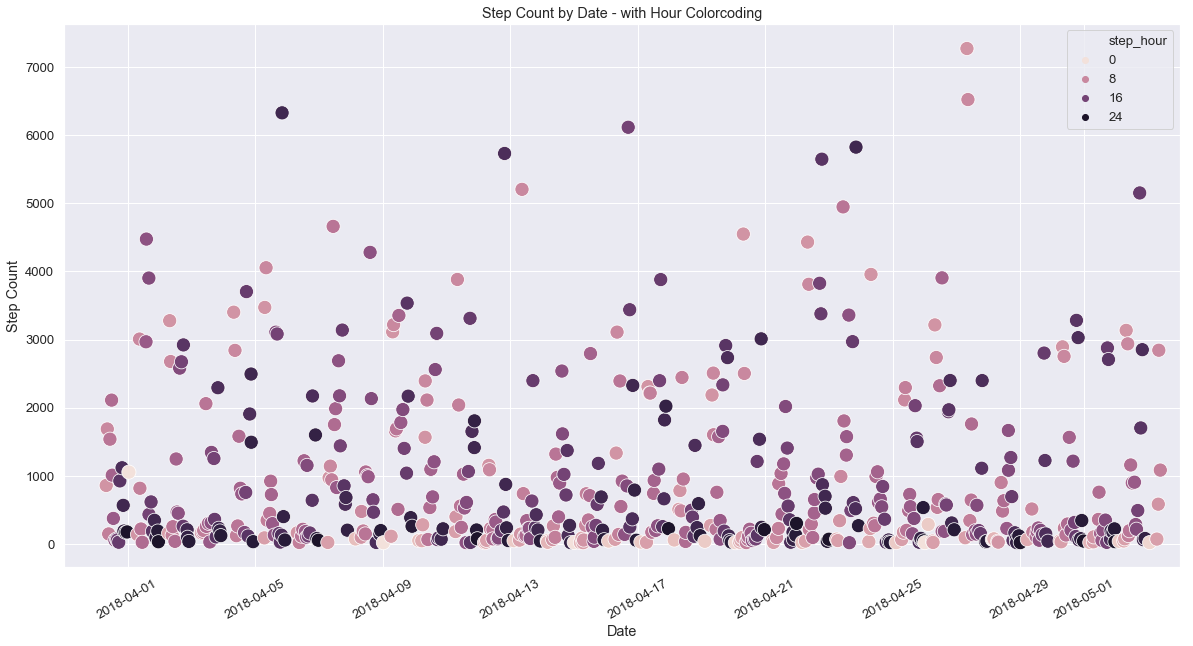

In [1607]:
fig = plt.figure(figsize=(20, 10))
palette = sns.cubehelix_palette(dark=.1, light=.9, as_cmap=True)
ax = sns.scatterplot(data=step_count_merged_hour, 
                     x='end_time',y='count', hue='step_hour', palette=palette, s=200)
ax = ax.set(xlabel='Date', ylabel='Step Count', xlim=('2018-03-30', '2018-05-04'))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Step Count by Date - with Hour Colorcoding')
plt.show(ax)

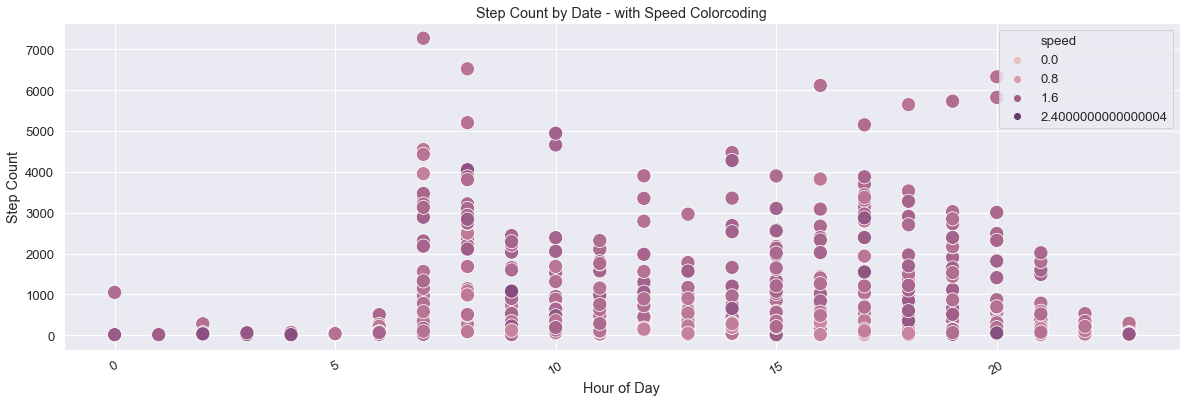

In [1608]:
fig = plt.figure(figsize=(20, 6))
palette = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(data=step_count_merged_hour, 
                     x='step_hour',y='count', hue='speed', palette=palette, s=200)
ax = ax.set(xlabel='Hour of Day', ylabel='Step Count')
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Step Count by Date - with Speed Colorcoding')
plt.show(ax)

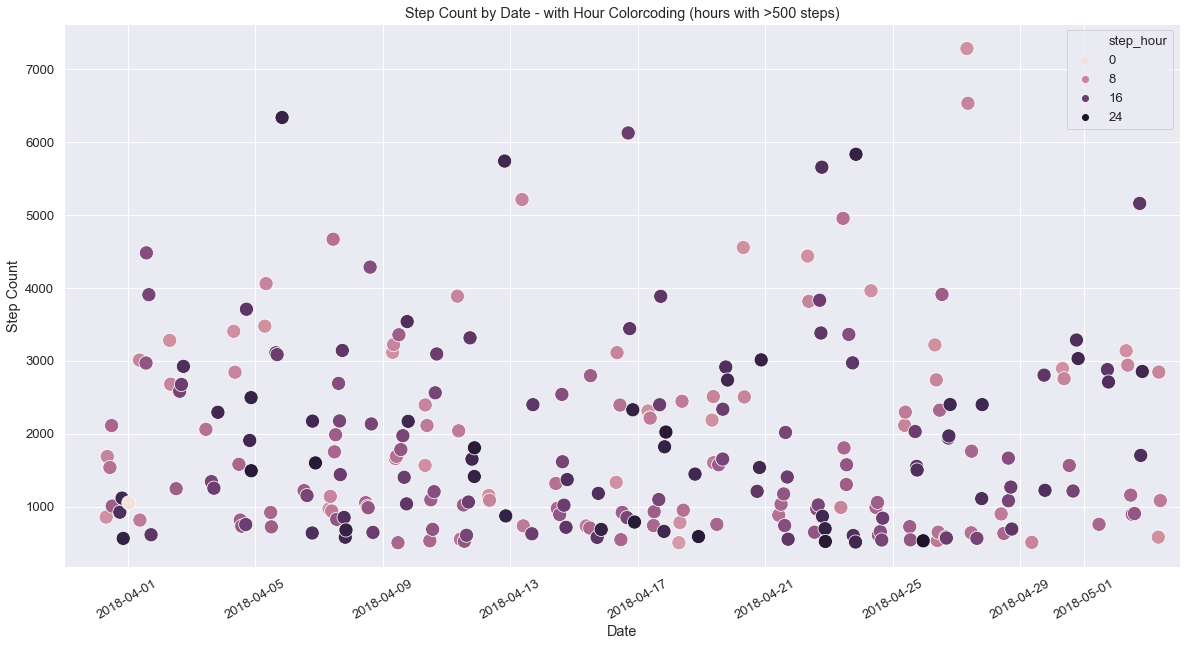

In [1609]:
step_count_merged_hour_active = step_count_merged_hour[step_count_merged_hour['count']>500]

fig = plt.figure(figsize=(20, 10))
palette = sns.cubehelix_palette(dark=.1, light=.9, as_cmap=True)
ax = sns.scatterplot(data=step_count_merged_hour_active, 
                     x='end_time',y='count', hue='step_hour', palette=palette, s=200)
ax = ax.set(xlabel='Date', ylabel='Step Count', xlim=('2018-03-30', '2018-05-04'))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Step Count by Date - with Hour Colorcoding (hours with >500 steps)')
plt.show(ax)

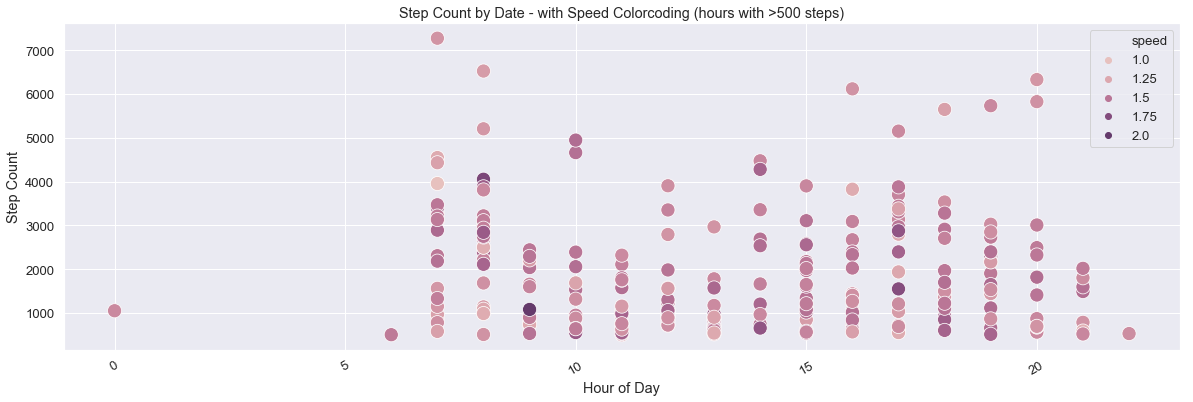

In [1610]:
fig = plt.figure(figsize=(20, 6))
palette = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(data=step_count_merged_hour_active, 
                     x='step_hour',y='count', hue='speed', palette=palette, s=200)
ax = ax.set(xlabel='Hour of Day', ylabel='Step Count')
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Step Count by Date - with Speed Colorcoding (hours with >500 steps)')
plt.show(ax)

### Observations

- According to research of healthy invididual's average walking speeds, at 1.42m/s this person is very healthy.
- This person walks more on average on weekdays than on weekends, but still manages to walk at least 5000 steps every day. It is very likely that he does not own a car or take any public transportation.
- This person also burns a lot of calories everyday, suggesting that he eats a lot. 

# Floors Climbed Data Analysis

In [1611]:
floors_climbed_df = pd.read_csv('../Project/floors_climbed.csv')

In [1612]:
floors_climbed_df['start_time'] = pd.to_datetime(floors_climbed_df['start_time'])
floors_climbed_df['end_time'] = pd.to_datetime(floors_climbed_df['end_time'])
floors_climbed_df['update_time'] = pd.to_datetime(floors_climbed_df['update_time'])
floors_climbed_df['create_time'] = pd.to_datetime(floors_climbed_df['create_time'])

floors_climbed_df['floor_date'] = floors_climbed_df['end_time'].dt.date
floors_climbed_df['floor_hour'] = floors_climbed_df['end_time'].dt.hour 

In [1613]:
floors_climbed_df['time_offset'].unique()

array(['UTC-0400', 'UTC-0300', 'UTC-0700'], dtype=object)

In [1614]:
floors_climbed_df.head()

Unnamed: 0            end_time                     pkg_name time_offset  \
0           0 2018-01-24 21:30:56  com.sec.android.app.shealth    UTC-0400   
1           1 2018-03-27 21:04:27  com.sec.android.app.shealth    UTC-0300   
2           2 2018-02-12 07:40:16  com.sec.android.app.shealth    UTC-0400   
3           3 2018-03-16 17:17:22  com.sec.android.app.shealth    UTC-0300   
4           4 2018-01-22 15:50:38  com.sec.android.app.shealth    UTC-0400   

           start_time  floor                              datauuid  \
0 2018-01-24 21:29:51    2.0  00443274-6e30-97f9-3eb2-75d17f3e766f   
1 2018-03-27 21:04:01    1.0  00ed787d-a38b-8fcf-886d-b15a30e02ff6   
2 2018-02-12 07:38:21    2.0  012ee314-b5de-8ac7-0421-c634e858ebc4   
3 2018-03-16 17:17:05    1.0  016876d6-2d1f-5514-a6c2-12b580e0654c   
4 2018-01-22 15:50:22    1.0  01c24d32-905b-9f65-732e-3c13faf2a1c4   

              update_time             create_time  floor_date  floor_hour  
0 2018-01-24 21:34:47.756 2018-01-24 21:34:47.720  2018-01-24          21  
1 2018-03-27 21:11:51.606 2018-03-27 21:11:51.606  2018-03-27          21  
2 2018-02-12 07:41:27.854 2018-02-12 07:41:27.802  2018-02-12           7  
3 2018-03-16 17:22:41.066 2018-03-16 17:22:41.044  2018-03-16          17  
4 2018-01-22 15:52:59.388 2018-01-22 15:52:59.367  2018-01-22          15

In [1615]:
floors_climbed_df['dayofweek'] = floors_climbed_df['end_time'].dt.dayofweek
floors_climbed_df.at[floors_climbed_df['dayofweek'] < 5, 'dayofweek'] = 'weekday'
floors_climbed_df.at[((floors_climbed_df['dayofweek'] == 5) | (floors_climbed_df['dayofweek'] == 6)), 'dayofweek'] = 'weekend'

In [1616]:
agg_func = {'start_time': 'first', 
            'end_time': 'last', 
            'floor': 'sum',
            'time_offset': 'first',
            'dayofweek': 'first'}
floors_climbed_day = floors_climbed_df.groupby(['floor_date']).aggregate(agg_func)
floors_climbed_day['end_date'] = floors_climbed_day['end_time'].dt.date
floors_climbed_day.head(10)

start_time            end_time  floor time_offset  \
floor_date                                                              
2017-12-16 2017-12-16 11:28:13 2017-12-16 08:48:18   10.0    UTC-0400   
2017-12-17 2017-12-17 17:46:26 2017-12-17 17:48:36    9.0    UTC-0400   
2017-12-18 2017-12-18 09:15:09 2017-12-18 16:36:44   13.0    UTC-0400   
2017-12-19 2017-12-19 15:51:20 2017-12-19 17:58:52   10.0    UTC-0400   
2017-12-20 2017-12-20 15:31:21 2017-12-20 19:36:39    7.0    UTC-0700   
2017-12-21 2017-12-21 14:15:33 2017-12-21 11:17:42    9.0    UTC-0700   
2017-12-22 2017-12-22 18:58:40 2017-12-22 13:33:41    8.0    UTC-0700   
2017-12-23 2017-12-23 12:28:59 2017-12-23 11:55:36   10.0    UTC-0700   
2017-12-24 2017-12-24 11:44:06 2017-12-24 11:58:06   12.0    UTC-0700   
2017-12-25 2017-12-25 14:15:46 2017-12-25 12:20:59   79.0    UTC-0700   

           dayofweek    end_date  
floor_date                        
2017-12-16   weekend  2017-12-16  
2017-12-17   weekend  2017-12-17  
2017-12-18   weekday  2017-12-18  
2017-12-19   weekday  2017-12-19  
2017-12-20   weekday  2017-12-20  
2017-12-21   weekday  2017-12-21  
2017-12-22   weekday  2017-12-22  
2017-12-23   weekend  2017-12-23  
2017-12-24   weekend  2017-12-24  
2017-12-25   weekday  2017-12-25

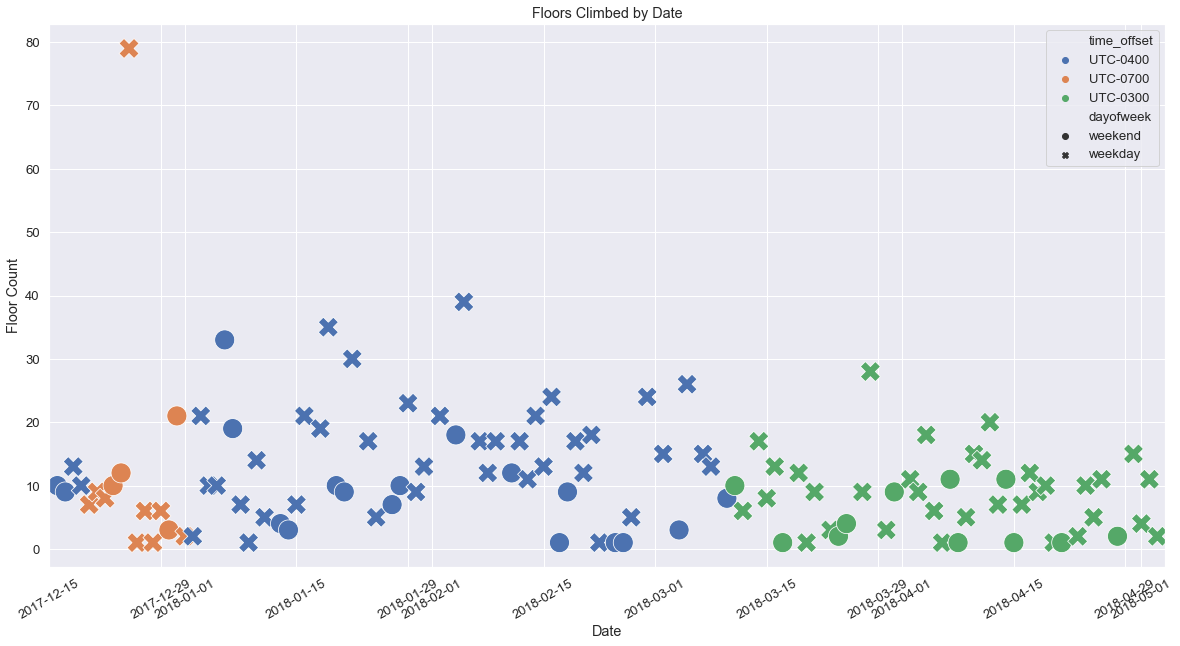

In [1617]:
fig = plt.figure(figsize=(20, 10))
ax = sns.scatterplot(data=floors_climbed_day, x='end_date', y='floor', hue='time_offset', style='dayofweek', s=400)
ax = ax.set(xlabel='Date', ylabel='Floor Count', xlim=('2017-12-15', '2018-05-04'))
plt.xticks(rotation=30)
plt.title('Floors Climbed by Date')
plt.show(ax)

### Observations
- This person climbs a varied amount of floors on a day-to-day basis. This may suggest that their work/school related activities involves going to different buildings and settings.
- Amazingly, this person climbed 79 floors on Christmas, while on holiday in another timezone. The elevator in his hotel must have broken that day, or the invidiual decided to do a stair challenge.

In [1618]:
pd.to_datetime(exercise_df[exercise_df['altitude_gain'].notnull()]['end_time'].dt.date)

112   2016-09-24
122   2017-03-06
146   2017-03-07
189   2017-11-28
208   2016-09-30
255   2016-06-25
299   2016-09-27
Name: end_time, dtype: datetime64[ns]

In [1619]:
floors_climbed_df[pd.to_datetime(floors_climbed_df['end_time'].dt.date).isin(pd.to_datetime(exercise_df[exercise_df['altitude_gain'].notnull()]['end_time'].dt.date))] 
# Exercise data days with altitude data does not overlap with floors_climbed data - Can't tell

Empty DataFrame
Columns: [Unnamed: 0, end_time, pkg_name, time_offset, start_time, floor, datauuid, update_time, create_time, floor_date, floor_hour, dayofweek]
Index: []

# Merging: Exercise, Heart rate, Step count, Floors Climbed

In [1620]:
exercise_df.head()

Unnamed: 0                end_time  altitude_loss  max_altitude  \
0           0 2018-04-07 17:40:40.673            NaN           NaN   
1           1 2018-01-27 10:08:00.000            NaN           NaN   
2           2 2018-05-01 18:12:20.915            NaN           NaN   
3           3 2018-02-24 13:50:02.929            NaN           NaN   
4           4 2018-03-16 17:25:39.584            NaN           NaN   

               start_time  count  altitude_gain  exercise_custom_type  \
0 2018-04-07 17:26:10.149    NaN            NaN                   NaN   
1 2018-01-27 09:38:00.000    0.0            NaN                   NaN   
2 2018-05-01 18:01:24.059    NaN            NaN                   NaN   
3 2018-02-24 13:35:13.243    NaN            NaN                   NaN   
4 2018-03-16 17:15:20.192    NaN            NaN                   NaN   

   duration  deviceuuid  max_heart_rate  max_rpm  mean_heart_rate  \
0    870524  F/D7+hL5E5             0.0      NaN              0.0   
1   1800000  jQfnryI8/B             NaN      NaN              NaN   
2    656856  F/D7+hL5E5             0.0      NaN              0.0   
3    889686  F/D7+hL5E5             0.0      NaN              0.0   
4    619392  F/D7+hL5E5             0.0      NaN              0.0   

                      pkg_name  max_cadence time_offset  \
0  com.sec.android.app.shealth          0.0    UTC-0300   
1  com.sec.android.app.shealth          NaN    UTC-0400   
2  com.sec.android.app.shealth          0.0    UTC-0300   
3  com.sec.android.app.shealth          0.0    UTC-0400   
4  com.sec.android.app.shealth          0.0    UTC-0300   

   mean_caloricburn_rate  incline_distance exercise_type  decline_distance  \
0                    NaN               NaN       Walking               NaN   
1                    NaN               NaN      Swimming               NaN   
2                    NaN               NaN       Walking               NaN   
3                    NaN               NaN       Cycling               NaN   
4                    NaN               NaN       Walking               NaN   

   max_speed  mean_power  max_power  mean_rpm  calorie  mean_cadence  \
0   1.588526         NaN        NaN       NaN   58.420           0.0   
1        NaN         NaN        NaN       NaN  252.000           NaN   
2   1.571783         NaN        NaN       NaN   43.850           0.0   
3        NaN         NaN        NaN       NaN  166.074           0.0   
4   1.611111         NaN        NaN       NaN   42.630           0.0   

   mean_speed              update_time  min_altitude  min_heart_rate  \
0    1.257754  2018-04-07 17:41:42.416           NaN             0.0   
1    0.000000  2018-01-27 10:09:23.176           NaN             NaN   
2    1.323111  2018-05-01 18:13:21.374           NaN             0.0   
3         NaN  2018-02-24 13:52:08.229           NaN             0.0   
4    1.413036  2018-03-16 17:26:39.581           NaN             0.0   

   count_type                                          live_data  \
0         NaN  009c4899-f8fb-c887-294a-045dcce7c880.live_data...   
1  Repetition                                                NaN   
2         NaN  020502c3-3cc7-8d33-f7bc-2d8e27609a47.live_data...   
3         NaN  0282b74e-1956-64c6-8ac9-5c44afdcb6c1.live_data...   
4         NaN  02c7f233-9af6-3288-e412-21747dcd9a98.live_data...   

   max_caloricburn_rate  custom comment  additional  distance  \
0                   NaN     NaN     NaN         NaN  1008.610   
1                   NaN     NaN     NaN         NaN     0.000   
2                   NaN     NaN     NaN         NaN   765.120   
3                   NaN     NaN     NaN         NaN       NaN   
4                   NaN     NaN     NaN         NaN   741.521   

                               datauuid              create_time dayofweek  
0  009c4899-f8fb-c887-294a-045dcce7c880  2018-04-07 17:41:42.416   weekend  
1  013f807f-0b24-45da-9df7-446c2e297a4f  2018-01-27 10:08:40.225   weekend  
2  0205

In [1621]:
exercise_df['end_hour'] = exercise_df['end_time'].dt.hour
exercise_df['end_date'] = exercise_df['end_time'].dt.date

In [1622]:
heart_rate_df.head()

Unnamed: 0                end_time  heart_rate binning_data  \
0           0 2017-12-16 04:30:29.450        60.0          NaN   
1           1 2017-12-16 05:50:29.380        56.0          NaN   
2           2 2017-12-30 02:08:16.211        55.0          NaN   
3           3 2018-01-15 14:47:37.175        62.0          NaN   
4           4 2017-12-16 02:20:29.470        47.0          NaN   

               start_time  heart_beat_count             update_time  max  min  \
0 2017-12-16 04:30:29.450                 1 2017-12-16 04:35:00.341  0.0  0.0   
1 2017-12-16 05:50:29.380                 1 2017-12-16 05:55:00.264  0.0  0.0   
2 2017-12-30 02:08:16.211                 1 2017-12-30 02:08:16.411  0.0  0.0   
3 2018-01-15 14:47:37.175                 1 2018-01-15 14:47:37.371  0.0  0.0   
4 2017-12-16 02:20:29.470                 1 2017-12-16 02:35:00.252  0.0  0.0   

                      pkg_name time_offset  \
0  com.sec.android.app.shealth    UTC-0400   
1  com.sec.android.app.shealth    UTC-0400   
2  com.sec.android.app.shealth    UTC-0700   
3  com.sec.android.app.shealth    UTC-0400   
4  com.sec.android.app.shealth    UTC-0400   

                               datauuid             create_time  
0  00978ee8-6b03-16cb-7bba-d22949a728cb 2017-12-16 04:35:00.341  
1  038d68e5-ddb9-df1f-f52f-4f85c32cb95a 2017-12-16 05:55:00.264  
2  0423adf2-6d1f-6e23-276b-ec25462bf3d5 2017-12-30 02:08:16.411  
3  07dc6531-0aa6-1b07-df29-049197357434 2018-01-15 14:47:37.371  
4  0a32cb55-8257-d3ae-e87a-e38ecb14fe97 2017-12-16 02:35:00.252

In [1623]:
heart_rate_df['heart_hour'] = heart_rate_df['end_time'].dt.hour
heart_rate_df['heart_date'] = heart_rate_df['end_time'].dt.date

In [1624]:
step_count_merged_hour.head()

step_hour          start_time                end_time  count  \
step_date                                                                  
2018-03-31          7 2018-03-31 07:48:00 2018-03-31 07:53:59.999    856   
2018-03-31          8 2018-03-31 08:28:00 2018-03-31 08:42:59.999   1686   
2018-03-31          9 2018-03-31 09:06:00 2018-03-31 09:45:59.999    144   
2018-03-31         10 2018-03-31 10:48:00 2018-03-31 10:42:00.000   1536   
2018-03-31         11 2018-03-31 11:47:00 2018-03-31 11:57:59.999   2110   

              calorie     speed     distance    end_date  
step_date                                                 
2018-03-31  34.940000  1.394269   560.059000  2018-03-31  
2018-03-31  75.120000  1.351729  1153.917000  2018-03-31  
2018-03-31   5.700000  1.218254    94.430000  2018-03-31  
2018-03-31  68.190000  1.521309  1187.410000  2018-03-31  
2018-03-31  89.250001  1.434198  1564.070002  2018-03-31

In [1625]:
floors_climbed_df.head()

Unnamed: 0            end_time                     pkg_name time_offset  \
0           0 2018-01-24 21:30:56  com.sec.android.app.shealth    UTC-0400   
1           1 2018-03-27 21:04:27  com.sec.android.app.shealth    UTC-0300   
2           2 2018-02-12 07:40:16  com.sec.android.app.shealth    UTC-0400   
3           3 2018-03-16 17:17:22  com.sec.android.app.shealth    UTC-0300   
4           4 2018-01-22 15:50:38  com.sec.android.app.shealth    UTC-0400   

           start_time  floor                              datauuid  \
0 2018-01-24 21:29:51    2.0  00443274-6e30-97f9-3eb2-75d17f3e766f   
1 2018-03-27 21:04:01    1.0  00ed787d-a38b-8fcf-886d-b15a30e02ff6   
2 2018-02-12 07:38:21    2.0  012ee314-b5de-8ac7-0421-c634e858ebc4   
3 2018-03-16 17:17:05    1.0  016876d6-2d1f-5514-a6c2-12b580e0654c   
4 2018-01-22 15:50:22    1.0  01c24d32-905b-9f65-732e-3c13faf2a1c4   

              update_time             create_time  floor_date  floor_hour  \
0 2018-01-24 21:34:47.756 2018-01-24 21:34:47.720  2018-01-24          21   
1 2018-03-27 21:11:51.606 2018-03-27 21:11:51.606  2018-03-27          21   
2 2018-02-12 07:41:27.854 2018-02-12 07:41:27.802  2018-02-12           7   
3 2018-03-16 17:22:41.066 2018-03-16 17:22:41.044  2018-03-16          17   
4 2018-01-22 15:52:59.388 2018-01-22 15:52:59.367  2018-01-22          15   

  dayofweek  
0   weekday  
1   weekday  
2   weekday  
3   weekday  
4   weekday

In [1629]:
step_count_merged_hour = step_count_merged_hour.reset_index()

In [1630]:
exercise_df_m = exercise_df[['distance','duration','exercise_type','time_offset','dayofweek','deviceuuid','max_heart_rate','end_hour','end_date']]
heart_rate_df_m = heart_rate_df[['heart_rate','time_offset','heart_hour','heart_date']]
step_count_m = step_count_merged_hour[['count','calorie', 'speed', 'distance', 'step_hour', 'step_date']]
floors_climbed_m = floors_climbed_df[['floor', 'floor_hour', 'floor_date']]

#### From here it seems like there is not much information to extract from merging the tables, other than on exercise data with floors climbed, to see the person's commuting patterns

In [1631]:
agg_func = {'floor_date': 'first', 
            'floor_hour': 'last', 
            'floor': 'sum'}
floors_climbed_hour = floors_climbed_m.groupby(['floor_date']).aggregate(agg_func)
floors_climbed_hour = floors_climbed_hour.reset_index(drop=True)

In [1632]:
merged_ex_floors = pd.merge(exercise_df_m, floors_climbed_hour, how='inner', left_on=['end_hour','end_date'], right_on=['floor_hour','floor_date'])

In [1633]:
merged_ex_floors = merged_ex_floors.drop_duplicates()

In [1634]:
merged_ex_floors.sort_values('end_date')

distance  duration exercise_type time_offset dayofweek  deviceuuid  \
15   901.92000    894319       Walking    UTC-0400   weekday  F/D7+hL5E5   
63   870.44000    868936       Walking    UTC-0700   weekend  F/D7+hL5E5   
49  4829.80800   1881177       Running    UTC-0700   weekend  F/D7+hL5E5   
47   779.57000    629831       Walking    UTC-0700   weekday  F/D7+hL5E5   
25   761.17000    616941       Walking    UTC-0400   weekday  F/D7+hL5E5   
71   872.46000    683629       Walking    UTC-0400   weekend  F/D7+hL5E5   
70     0.00000   1800000      Swimming    UTC-0400   weekday  jQfnryI8/B   
37     0.00000   2403361         Other    UTC-0400   weekend  F/D7+hL5E5   
30     0.00000   2677442         Other    UTC-0400   weekday  F/D7+hL5E5   
40   971.03300    892437       Walking    UTC-0400   weekday  F/D7+hL5E5   
33  2197.81100   1665872       Walking    UTC-0400   weekend  F/D7+hL5E5   
32   732.30000    714937       Walking    UTC-0400   weekend  F/D7+hL5E5   
31     0.00000   3957443         Other    UTC-0400   weekend  F/D7+hL5E5   
46     0.00000   2020564         Other    UTC-0400   weekday  F/D7+hL5E5   
0      0.00000   1800000      Swimming    UTC-0400   weekend  jQfnryI8/B   
67     0.00000   3065912         Other    UTC-0400   weekend  F/D7+hL5E5   
13   852.99000    822010       Walking    UTC-0400   weekday  F/D7+hL5E5   
45   865.64000    667316       Walking    UTC-0400   weekday  F/D7+hL5E5   
44  1454.98000   1097474       Walking    UTC-0400   weekday  jQfnryI8/B   
22   989.60100    959484       Walking    UTC-0400   weekday  F/D7+hL5E5   
21  1127.08000    896806       Walking    UTC-0400   weekday  jQfnryI8/B   
42   905.21000    633142       Walking    UTC-0400   weekday  jQfnryI8/B   
43   863.95000    734133       Walking    UTC-0400   weekday  F/D7+hL5E5   
10   945.98500   1006886       Walking    UTC-0400   weekday  F/D7+hL5E5   
58     0.00000   4812657         Other    UTC-0400   weekend  F/D7+hL5E5   
28  2005.33100   1625812       Walking    UTC-0400   weekday  F/D7+hL5E5   
29   863.22100    798299       Walking    UTC-0400   weekday  F/D7+hL5E5   
35  1100.39000    841110       Walking    UTC-0400   weekday  jQfnryI8/B   
36   998.22000    847942       Walking    UTC-0400   weekday  F/D7+hL5E5   
51         NaN    917652         Other    UTC-0400   weekend  F/D7+hL5E5   
..         ...       ...           ...         ...       ...         ...   
53  2245.98000   1747078       Walking    UTC-0300   weekday  jQfnryI8/B   
52  1992.51000   1834331       Walking    UTC-0300   weekday  F/D7+hL5E5   
6   1185.87000    869372       Walking    UTC-0300   weekday  jQfnryI8/B   
7   2365.21000   1781940       Walking    UTC-0300   weekday  jQfnryI8/B   
4   2045.67000   1705277       Walking    UTC-0300   weekday  F/D7+hL5E5   
5   1134.17200    875908       Walking    UTC-0300   weekday  F/D7+hL5E5   
27   644.10000    687822       Walking    UTC-0300   weekend  F/D7+hL5E5   
26   747.11200    675254       Walking    UTC-0300   weekend  F/D7+hL5E5   
57   903.83997    778486       Walking    UTC-0300   weekday  jQfnryI8/B   
56   861.84700    753839       Walking    UTC-0300   weekday  F/D7+hL5E5   
19  2479.41000   1887204       Walking    UTC-0300   weekday  jQfnryI8/B   
18   833.96000    690909       Walking    UTC-0300   weekday  jQfnryI8/B   
17  2006.86200   1882077       Walking    UTC-0300   weekday  F/D7+hL5E5   
16   880.60000    837118       Walking    UTC-0300   weekday  F/D7+hL5E5   
20   826.05400    868151       Walking    UTC-0300   weekday  F/D7+hL5E5   
39     0.00000   3979437         Other    UTC-0300   weekend  F/D7+hL5E5   
68   766.97100    619240       Walking    UTC-0300   weekday  F/D7+hL5E5   
69   885.99000    724397       Walking    UTC-0300   weekday  jQfnryI8/B   
66   819.96900    759865       Walking    UTC-0300   weekday  F/D7+hL5E5   
54  1585.86100   1366868       Walking    UTC-0300   weekday  F/D7+hL5E5   
55  1583.30000   1126450       Walking    UTC-0300   w

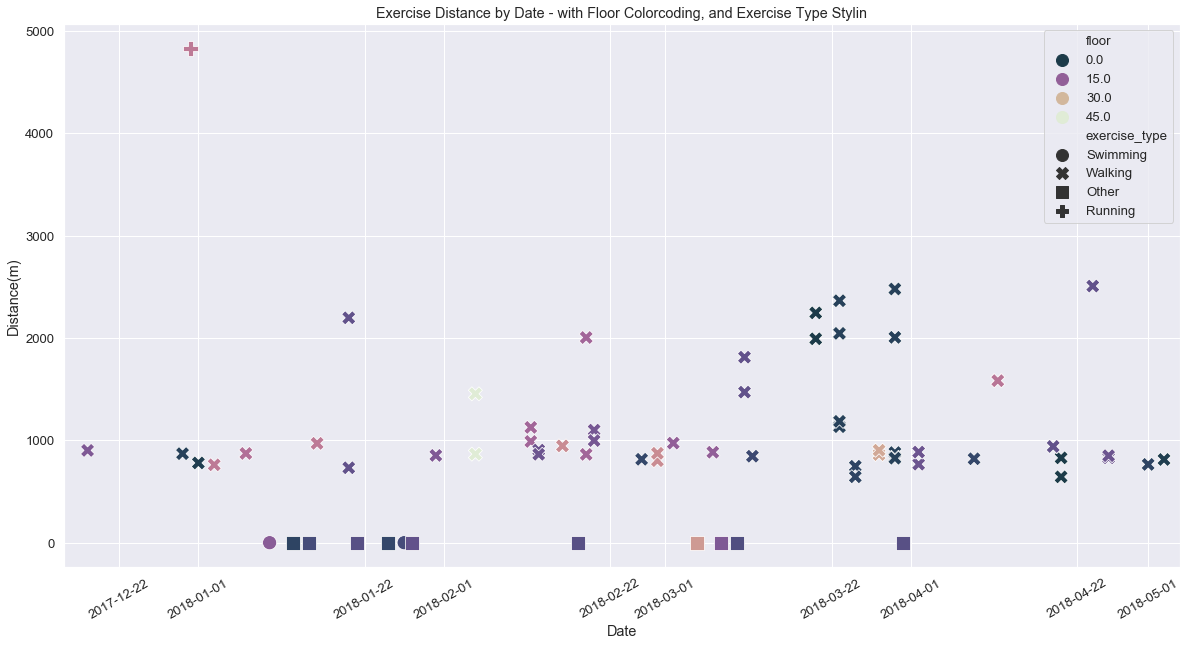

In [1635]:
fig = plt.figure(figsize=(20, 10))
palette = sns.cubehelix_palette(4, start=2, rot=1, dark=.2, light=.9, as_cmap=True, reverse=True)
ax = sns.scatterplot(data=merged_ex_floors, x='end_date',y='distance', hue='floor', palette=palette, style='exercise_type', s=200)
ax = ax.set(xlabel='Date', ylabel='Distance(m)', xlim=('2017-12-15', '2018-05-05'))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1), markerscale=2)
plt.title('Exercise Distance by Date - with Floor Colorcoding, and Exercise Type Stylin')
plt.show(ax)

### Observations
- From the plot above it seems like there is not much correlation between the person's commute and the floors climbed when matched by hour. This means that their commute is inconsistent - They are almost always taking a different path, leading to the conclusion that they are either a student who goes to different classrooms, or work a job that involves going to different locations all the time.
- There are points on the graph where the exercise distance does not correlate to the exercise type being performed, meaning that sometimes when floors climbed is recorded the exercise is not being recorded.

# Conclusions:

Inferencing all the data, the person who this data belongs to is a healthy individual most likely between the ages of 18-30, based on their average walking speed pattern of 1.43m/s. It is not completely certain what their gender is, but they are mostly likely male because of this statistic, as females have a slower average walking speed. 

The name 'Azi' comes up once under the 'comment' column in the exercise data, and combining this with information from heart rate data, suggests that this person is Indian and has moved to North America from there for work or school.

Looking at the timezone information in all the data, Azi had first moved to somewhere in central U.S. or Canada, some city with the UTC-0600/UTC-0700 MDT timezone. Large cities within this timezone include Edmonton, Calgary, Denver, Salt Lake City, etc. It is more likely that this city is within Canada because Azi eventually moves to the UTC-0300/UTC-400 ADT timezone, of which only Canadian cities are within, such as Halifax. There was a possibility that the latter city may have been in South American, but most countries there do not observe Daylight Savings.

Azi is incredibly healthy in terms of exercise, with step count measuring at least 5000 per day within the step count dataset. Azi also engages in a variety of exercises that includes swimming and 'other', a high-intensity 0-distance exercise which was inferred to be jump-rope. 

Azi's sleep pattern is quite regular, with about 7.5 hours every night on average. He tends to sleep early around 9PM and wake early around 4AM to exercise then go to school/work. It is not known how sleep efficiency is measured, but it does correlate with Azi's sleep duration - The less he sleeps, the less efficient his sleep becomes.

Azi also climbs quite a few floors on a regular basis, sometimes more than 20 in a day. From this data it was inferred that since Azi climbes a varied number of floors on a day-to-day basis that he does not work in a stable office job, thus he is either a student in school or works a job where he goes to different buildings for his work. It is more like that he is a student that traverses floors to go to different classrooms in different buildings at a university. 

During Christmas of 2017 he cimbed 79 floors in one day. This is unlikely to be a winter hike, so he may have done a stair-climbing challenge or used a stair-climber machine at a gym.



notes

- week # of year
- separate walking exercises by speed and duration
- exclude small number of floors to find patterns
- corner plots? how to make conclusions (pairplot)
- overlapping of timezones on dataset
- plot by every single day of week

for first draft of final project: (due next Friday Dec 6)
- new analysis
- simple web app
- maybe GCP deployment

by end:
- get cool Dash GCP deployment